In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500) 
pd.set_option('display.max_rows',500)

# Application Data

In [2]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
application_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
application_data.shape

(307511, 122)

## Handle Missing Values

In [5]:
temp = (100*(application_data.isnull().sum()/application_data.shape[0])).reset_index().rename(columns={'index':'column_name', 0 :'%missing'})
temp

,column_name,%missing
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [6]:
temp[temp['%missing']>=30].shape

(50, 2)

- Dropping the data having more than 30% of missing values for not impacting further analysis

In [7]:

drop_column = list(temp[temp['%missing']>=30]['column_name'])
drop_column

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [8]:
application_data = application_data.drop(drop_column, axis=1)

In [9]:
application_data.shape

(307511, 72)

In [10]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

- Dropping NaN Rows of AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE & Remaining others column missing values will not affect my analysis.

In [11]:
application_data = application_data [~(application_data['AMT_ANNUITY'].isnull())]

In [12]:
application_data.shape

(307499, 72)

In [13]:
application_data = application_data [~(application_data['AMT_GOODS_PRICE'].isnull())]
application_data = application_data [~(application_data['NAME_TYPE_SUITE'].isnull())]

In [14]:
application_data.shape

(306207, 72)

- CHECKING FOR EXT_SOURCE_2 & EXT_SOURCE_3.

- FILL NA VALUES WITH MODE

In [15]:
application_data.EXT_SOURCE_2.mode()[0]

0.2858978721410488

In [16]:
application_data.EXT_SOURCE_3.median()

0.5352762504724826

In [17]:
application_data['EXT_SOURCE_2'] = application_data['EXT_SOURCE_2'].fillna(application_data.EXT_SOURCE_2.mode()[0])
application_data['EXT_SOURCE_3'] = application_data['EXT_SOURCE_3'].fillna(application_data.EXT_SOURCE_3.mode()[0])

In [18]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163246
1.0       48582
2.0       29678
3.0       20226
4.0       14069
5.0        9514
6.0        6427
7.0        4365
8.0        2944
9.0        1996
10.0       1371
11.0        849
12.0        647
13.0        408
14.0        258
15.0        164
16.0        133
17.0         87
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [19]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [20]:
application_data.DEF_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

- FILL NAN VALUES OF OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE 9 #WITH MODE FUNCTION

In [21]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0])
application_data['OBS_60_CNT_SOCIAL_CIRCLE'] = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0])
application_data['DEF_30_CNT_SOCIAL_CIRCLE'] = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0])
application_data['DEF_60_CNT_SOCIAL_CIRCLE'] = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0])

- Now Checking the AMT_REQ_CREDIT_BUREAU_HOUR,DAY,MON,QRT,YEAR COlUMN

In [22]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.993901
1.0    0.005850
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [23]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    264798.000000
mean          0.006390
std           0.083793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [24]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

0.0    0.994407
1.0    0.004857
2.0    0.000400
3.0    0.000166
4.0    0.000094
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [25]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

0.0    0.967821
1.0    0.030952
2.0    0.000748
3.0    0.000215
4.0    0.000125
6.0    0.000076
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [26]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

0.0     0.835206
1.0     0.124884
2.0     0.020261
3.0     0.007500
4.0     0.004056
5.0     0.002255
6.0     0.001284
7.0     0.001122
9.0     0.000774
8.0     0.000687
10.0    0.000498
11.0    0.000442
12.0    0.000291
13.0    0.000272
14.0    0.000147
15.0    0.000132
16.0    0.000087
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
23.0    0.000004
27.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [27]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

0.0      0.809659
1.0      0.127475
2.0      0.054230
3.0      0.006446
4.0      0.001786
5.0      0.000238
6.0      0.000106
8.0      0.000026
7.0      0.000026
261.0    0.000004
19.0     0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [28]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

0.0     0.268627
1.0     0.238665
2.0     0.189012
3.0     0.126712
4.0     0.078041
5.0     0.045438
6.0     0.026254
7.0     0.014573
8.0     0.008025
9.0     0.004124
12.0    0.000113
11.0    0.000113
10.0    0.000083
13.0    0.000072
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
25.0    0.000004
23.0    0.000004
22.0    0.000004
21.0    0.000004
20.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [29]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mean()

1.9038776727920905

In [30]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    264798.000000
mean          1.903878
std           1.869511
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [31]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    264798.000000
mean          0.267612
std           0.915641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

- With the help of Describe, Value_counts, mean, mode, median function we can clearly seen that 

 [AMT_REQ_CREDIT_BUREAU_HOUR,DAY,WEEK,MONTH having 85 to 90% values is 0. so using mode function we will fill Nan values with 0]
 [AMT_REQ_CREDIT_BUREAU_QRT,YEAR we will fill NaN values with mean function]

In [32]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])
application_data['AMT_REQ_CREDIT_BUREAU_DAY'] = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
application_data['AMT_REQ_CREDIT_BUREAU_MON'] = application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

In [33]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_QRT.mean())
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mean())

In [34]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

# Dropping Unwanted Columns

In [35]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [36]:
drop_column1 = ['FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_EMAIL','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE']

In [37]:
application_data = application_data[~(application_data.drop(drop_column1,axis=1, inplace=True))]

TypeError: bad operand type for unary ~: 'NoneType'

In [38]:
application_data.shape

(306207, 40)

# Data Handling/Cleaning

- Checking all the data columns to find any outliers

In [39]:
application_data.FLAG_OWN_CAR.value_counts()  #ok

N    202037
Y    104170
Name: FLAG_OWN_CAR, dtype: int64

In [40]:
application_data.FLAG_OWN_REALTY.value_counts()   #ok

Y    212843
N     93364
Name: FLAG_OWN_REALTY, dtype: int64

In [41]:
application_data.NAME_TYPE_SUITE.value_counts()   #ok

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
application_data.CODE_GENDER.value_counts()  

F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64

- 4 XNA Values which we will covert to F bcz large number of F in dataset

In [43]:
application_data.CODE_GENDER.replace(to_replace='XNA', value='F', inplace = True)

In [44]:
application_data.CODE_GENDER.value_counts()

F    201639
M    104568
Name: CODE_GENDER, dtype: int64

In [45]:
application_data.AMT_INCOME_TOTAL.value_counts(normalize=True)  #ok

135000.0    0.116340
112500.0    0.100860
157500.0    0.086415
180000.0    0.080419
90000.0     0.073049
              ...   
262503.0    0.000003
80383.5     0.000003
123975.0    0.000003
103842.0    0.000003
113062.5    0.000003
Name: AMT_INCOME_TOTAL, Length: 2518, dtype: float64

In [46]:
application_data.NAME_INCOME_TYPE.value_counts()  #ok

Working                 158126
Commercial associate     71254
Pensioner                55164
State servant            21609
Unemployed                  22
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [47]:
application_data.NAME_EDUCATION_TYPE.value_counts()  #ok

Secondary / secondary special    217581
Higher education                  74413
Incomplete higher                 10241
Lower secondary                    3809
Academic degree                     163
Name: NAME_EDUCATION_TYPE, dtype: int64

In [48]:
application_data.NAME_FAMILY_STATUS.value_counts()  #ok

Married                 195641
Single / not married     45197
Civil marriage           29659
Separated                19695
Widow                    16015
Name: NAME_FAMILY_STATUS, dtype: int64

In [49]:
application_data.NAME_HOUSING_TYPE.value_counts()  #ok

House / apartment      271709
With parents            14774
Municipal apartment     11146
Rented apartment         4862
Office apartment         2603
Co-op apartment          1113
Name: NAME_HOUSING_TYPE, dtype: int64

In [50]:
application_data.DAYS_BIRTH.value_counts()  #ok

-13749    42
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-25042     1
-25147     1
-25052     1
-8014      1
-25061     1
Name: DAYS_BIRTH, Length: 17458, dtype: int64

In [51]:
application_data.ORGANIZATION_TYPE.value_counts()  #ok

Business Entity Type 3    67683
XNA                       55178
Self-employed             38256
Other                     16621
Medicine                  11144
Business Entity Type 2    10509
Government                10356
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5962
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3228
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7           1301
Transpor

Organization_Type colunm 55178 values are XNA / Nan Values. XNA values count is huge. 
So we are not replacing these values with other also not dropping these rows. 
Because we can not assume these XNA are Busines Entity or Workerer, School etc.

- Converting DAYS_BIRTH Column in years by dividing 365 to better understanding in years

In [52]:
application_data.DAYS_BIRTH = application_data.DAYS_BIRTH.apply(lambda x : abs(x)/365)

In [53]:
application_data.DAYS_BIRTH.value_counts()

37.668493    42
36.934247    42
27.452055    41
49.994521    41
28.197260    40
             ..
68.608219     1
68.895890     1
68.635616     1
21.956164     1
68.660274     1
Name: DAYS_BIRTH, Length: 17458, dtype: int64

In [54]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,-637,-3648.0,-2120,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,-1188,-1186.0,-291,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,-225,-4260.0,-2531,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,-3038,-4311.0,-3458,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


- Converting DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH Column in years by dividing 365 to better understanding in anaylsis

In [55]:
application_data.DAYS_EMPLOYED = application_data.DAYS_EMPLOYED.apply(lambda x : abs(x)/365)
application_data.DAYS_REGISTRATION = application_data.DAYS_REGISTRATION.apply(lambda x : abs(x)/365)
application_data.DAYS_ID_PUBLISH = application_data.DAYS_ID_PUBLISH.apply(lambda x : abs(x)/365)

In [56]:
application_data.head()   # cross checking code execution.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [57]:
application_data.ORGANIZATION_TYPE.value_counts()    #ok.

Business Entity Type 3    67683
XNA                       55178
Self-employed             38256
Other                     16621
Medicine                  11144
Business Entity Type 2    10509
Government                10356
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5962
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3228
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7           1301
Transpor

# UNIVARIATE ANALYSIS on Application data set column

#### Numerical Data

##### AMT_INCOME_TOTAL

In [58]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.062070e+05
mean     1.687825e+05
std      2.375206e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

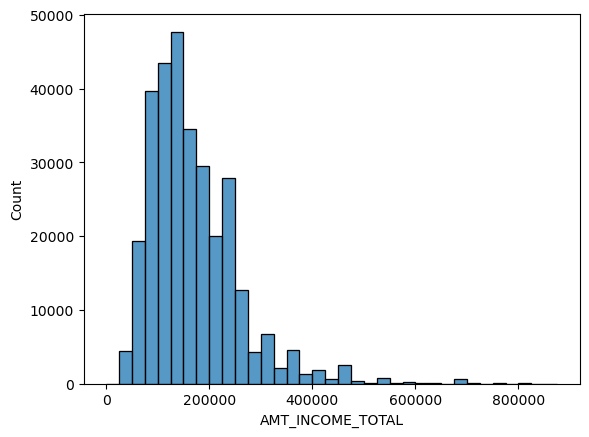

In [59]:
bins = [i for i in range(0,900000,25000)]

sns.histplot(application_data.AMT_INCOME_TOTAL, bins = bins)

In [60]:
pd.cut(application_data.AMT_INCOME_TOTAL, [0,50000,100000,200000,300000,400000,500000,600000,2500000], labels=['0-0.5','0.5-1','1-2','2-3','3-4','4-5','5-6','6+'])

0           2-3
1           2-3
2         0.5-1
3           1-2
4           1-2
          ...  
307506      1-2
307507    0.5-1
307508      1-2
307509      1-2
307510      1-2
Name: AMT_INCOME_TOTAL, Length: 306207, dtype: category
Categories (8, object): ['0-0.5' < '0.5-1' < '1-2' < '2-3' < '3-4' < '4-5' < '5-6' < '6+']

In [61]:
application_data['AMT_INCOME_TOTAL'] = pd.cut(application_data.AMT_INCOME_TOTAL, [0,50000,100000,200000,300000,400000,500000,600000,2500000], labels=['0-0.5','0.5-1','1-2','2-3','3-4','4-5','5-6','6+'])

In [62]:
application_data.AMT_INCOME_TOTAL.value_counts(normalize=True)

1-2      0.507117
2-3      0.212004
0.5-1    0.192405
3-4      0.047683
4-5      0.017417
0-0.5    0.014681
6+       0.005154
5-6      0.003540
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

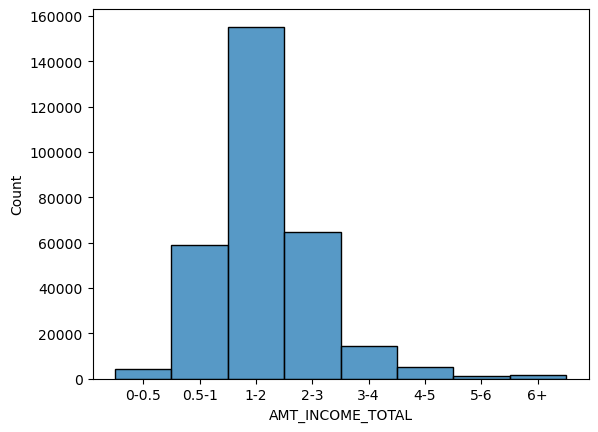

In [63]:
sns.histplot(application_data.AMT_INCOME_TOTAL)

In [64]:
application_data[application_data['AMT_INCOME_TOTAL']=='6+']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
319,100366,0,Revolving loans,M,Y,Y,0,6+,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.002506,32.295890,8.613699,15.460274,10.854795,1.0,THURSDAY,7,0,Business Entity Type 3,0.765981,0.511892,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
332,100380,0,Cash loans,F,N,Y,0,6+,900000.0,57519.0,900000.0,Family,Working,Higher education,Married,House / apartment,0.072508,41.158904,4.057534,0.008219,6.802740,2.0,SATURDAY,13,0,Business Entity Type 3,0.598937,0.746300,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
391,100454,0,Revolving loans,M,Y,Y,3,6+,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,37.068493,8.956164,2.704110,11.945205,5.0,THURSDAY,10,0,Other,0.623473,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
1064,101235,0,Revolving loans,F,N,Y,0,6+,1350000.0,67500.0,1350000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.010147,57.616438,1000.665753,0.882192,10.449315,2.0,THURSDAY,13,0,XNA,0.450422,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
1238,101461,0,Cash loans,M,Y,Y,0,6+,661500.0,37066.5,661500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,59.632877,13.876712,30.542466,3.764384,2.0,SATURDAY,10,0,Business Entity Type 3,0.629307,0.593718,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305941,454468,0,Cash loans,F,N,Y,1,6+,539100.0,27652.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.009334,41.342466,14.400000,9.106849,14.306849,3.0,THURSDAY,12,0,Self-employed,0.478039,0.506484,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,2.000000,0.000000
306005,454539,0,Cash loans,M,Y,N,0,6+,1078200.0,31522.5,900000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.014464,55.852055,2.827397,7.775342,10.386301,2.0,THURSDAY,5,0,Business Entity Type 3,0.553087,0.595456,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,2.0,0.000000,0.000000
306028,454569,0,Revolving loans,M,Y,Y,0,6+,1575000.0,78750.0,1575000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,35.471233,0.865753,10.819178,10.805479,2.0,THURSDAY,12,0,Business Entity Type 3,0.772679,0.529890,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
306179,454746,0,Cash loans,M,Y,Y,1,6+,735579.0,35518.5,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.072508,38.660274,4.073973,10.002740,4.287671,2.0,MONDAY,12,0,Business Entity Type 3,0.539413,0.526295,3.0,1.0,3.0,1.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


#### Checkin outlier in DAYS_EMPLOYED

In [65]:
application_data.DAYS_EMPLOYED.describe()

count    306207.000000
mean        185.675917
std         382.141320
min           0.000000
25%           2.558904
50%           6.084932
75%          15.657534
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [66]:
application_data.DAYS_EMPLOYED.quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])

0.25       2.558904
0.50       6.084932
0.75      15.657534
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
1.00    1000.665753
Name: DAYS_EMPLOYED, dtype: float64

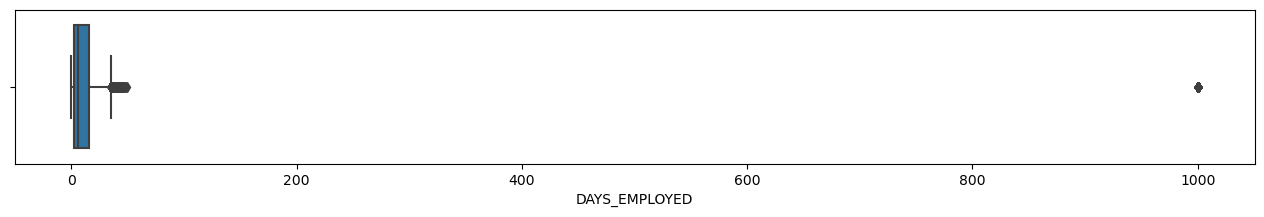

In [67]:
plt.figure(figsize=(16,2))                   
sns.boxplot(application_data.DAYS_EMPLOYED);     

In [68]:
application_data[application_data['DAYS_EMPLOYED']>500]

# We found approx 55k values that having employment more than 100 years. they all are pensioners
# It's Outlier & We ignore them for further analysis


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,1-2,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55.065753,1000.665753,20.347945,9.627397,2.0,WEDNESDAY,14,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
11,100015,0,Cash loans,F,N,Y,0,0-0.5,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,55.936986,1000.665753,14.372603,6.882192,2.0,FRIDAY,7,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,2.000000
23,100027,0,Cash loans,F,N,Y,0,0.5-1,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,68.019178,1000.665753,24.690411,10.093151,2.0,FRIDAY,12,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,3.000000
38,100045,0,Cash loans,F,N,Y,0,0.5-1,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,65.534247,1000.665753,26.895890,13.613699,2.0,FRIDAY,11,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,2.000000
43,100050,0,Cash loans,F,N,Y,0,1-2,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,64.515068,1000.665753,15.739726,12.536986,1.0,WEDNESDAY,9,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,2-3,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,61.408219,1000.665753,32.810959,11.427397,1.0,MONDAY,15,0,XNA,0.195625,0.360613,11.0,2.0,11.0,0.0,0,1,0.0,0.0,0.0,1.0,0.000000,0.000000
307483,456227,0,Cash loans,F,N,Y,0,0.5-1,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,68.249315,1000.665753,30.715068,11.542466,1.0,MONDAY,12,0,XNA,0.589906,0.520898,1.0,1.0,1.0,1.0,0,0,0.0,0.0,0.0,0.0,0.000000,5.000000
307487,456231,0,Cash loans,M,N,Y,0,1-2,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,63.356164,1000.665753,15.027397,11.273973,2.0,WEDNESDAY,10,0,XNA,0.307082,0.255332,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.000000,8.000000
307505,456249,0,Cash loans,F,N,Y,0,1-2,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,66.805479,1000.665753,20.189041,6.457534,1.0,MONDAY,15,0,XNA,0.346391,0.742182,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2.0,0.000000,0.000000


- We found approx 55k values that having employment more than 100 years. they all are pensioners
- It's Outlier & We ignore them for further analysis

##### AMT_CREDIT

In [69]:
application_data.AMT_CREDIT.describe()

count    3.062070e+05
mean     5.987984e+05
std      4.019606e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

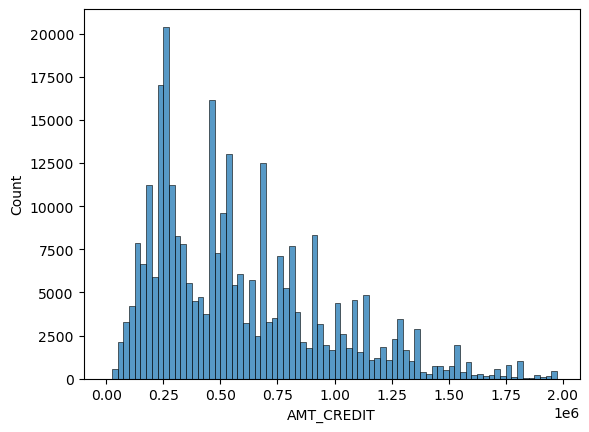

In [70]:
bins = [i for i in range(0,2000000,25000)]

sns.histplot(application_data.AMT_CREDIT, bins = bins);

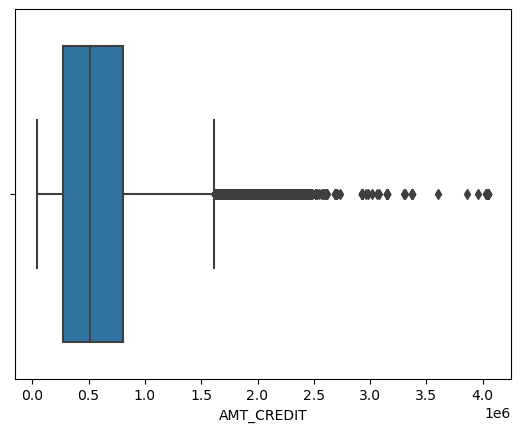

In [71]:
sns.boxplot(application_data.AMT_CREDIT); 

In [72]:
application_data.AMT_CREDIT.quantile([0.25,0.5,0.75,0.9,0.95,0.99,1]);

In [73]:
application_data[application_data['AMT_CREDIT']>4000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
14852,117337,0,Cash loans,M,N,Y,1,6+,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,Office apartment,0.072508,35.057534,3.758904,9.742466,12.728767,3.0,WEDNESDAY,14,0,Trade: type 7,0.639547,0.805020,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
17948,120926,0,Cash loans,M,Y,N,2,6+,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,41.578082,0.550685,4.189041,12.936986,4.0,THURSDAY,14,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
95571,210956,0,Cash loans,M,N,Y,0,4-5,4031032.5,102033.0,3712500.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.035792,45.136986,0.819178,0.112329,0.065753,1.0,MONDAY,12,0,Business Entity Type 3,0.447749,0.510090,1.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
110459,228135,0,Cash loans,M,N,N,2,6+,4050000.0,102384.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.025164,40.931507,1.731507,3.484932,3.465753,4.0,THURSDAY,8,0,Business Entity Type 3,0.280597,0.786267,3.0,1.0,3.0,1.0,0,0,0.0,0.0,0.0,4.0,0.000000,0.000000
119681,238782,0,Cash loans,M,Y,Y,1,6+,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,34.345205,1.865753,5.093151,12.605479,3.0,MONDAY,14,0,Transport: type 4,0.571261,0.652897,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
120757,240007,0,Cash loans,M,N,N,0,5-6,4050000.0,106969.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,54.501370,1.153425,27.465753,9.060274,2.0,THURSDAY,20,0,Industry: type 1,0.663432,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
133766,255139,0,Cash loans,F,Y,N,1,6+,4050000.0,100197.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,42.328767,0.687671,7.479452,3.654795,3.0,SATURDAY,16,0,Trade: type 2,0.628098,0.538863,1.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,2.000000
186230,315893,1,Cash loans,F,N,N,0,4-5,4027680.0,106380.0,3600000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.010147,51.800000,3.986301,15.600000,5.449315,2.0,WEDNESDAY,14,0,Business Entity Type 3,0.493912,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.265697,1.903878
287732,433294,0,Cash loans,F,Y,N,1,4-5,4050000.0,102514.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,31.109589,1.167123,0.117808,2.898630,3.0,WEDNESDAY,17,0,Business Entity Type 3,0.592158,0.746300,3.0,0.0,3.0,0.0,0,0,0.0,0.0,0.0,0.0,0.265697,1.903878
288455,434170,0,Cash loans,F,Y,N,1,4-5,4050000.0,106839.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.035792,45.504110,8.339726,0.345205,0.367123,3.0,TUESDAY,11,0,Business Entity Type 3,0.685893,0.758393,1.0,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


##### DAYS_REGISTRATION

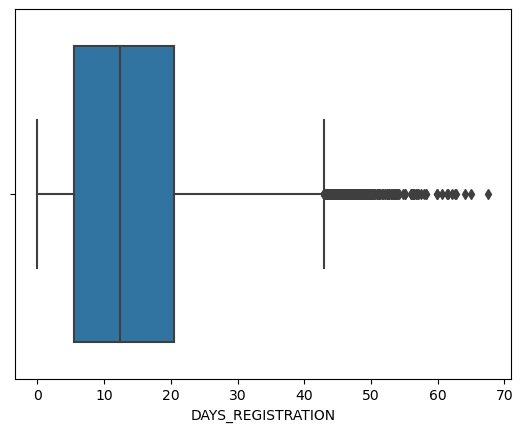

In [74]:
sns.boxplot(application_data.DAYS_REGISTRATION);

In [75]:
application_data.DAYS_REGISTRATION.describe()

count    306207.000000
mean         13.665660
std           9.650772
min           0.000000
25%           5.515068
50%          12.347945
75%          20.495890
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

##### AMT_ANNUITY

In [76]:
application_data.AMT_ANNUITY.describe()    

count    306207.000000
mean      27122.117024
std       14490.836220
min        1615.500000
25%       16551.000000
50%       24930.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

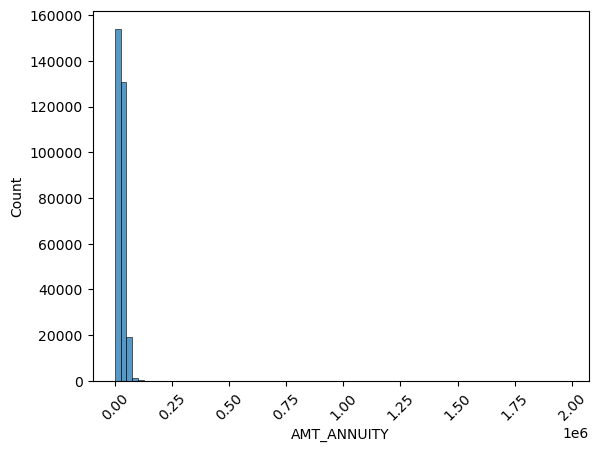

In [77]:
sns.histplot(application_data.AMT_ANNUITY, bins = bins)
plt.xticks(rotation=45);

In [78]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,1-2,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,1-2,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [79]:
pd.cut(application_data.AMT_ANNUITY, [0,5000,10000,15000,20000,25000,30000,35000,40000,250000], labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000','35000+'] )

ValueError: Bin labels must be one fewer than the number of bin edges

In [80]:
application_data.AMT_ANNUITY = pd.cut(application_data.AMT_ANNUITY, [0,5000,10000,15000,20000,25000,30000,35000,250000], labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000','35000+'] )

In [81]:
application_data.AMT_ANNUITY.value_counts(normalize=True)

35000+         0.243738
20000-25000    0.157283
25000-30000    0.143560
15000-20000    0.139181
10000-15000    0.131072
30000-35000    0.109648
5000-10000     0.071801
0-5000         0.003716
Name: AMT_ANNUITY, dtype: float64

In [82]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,5000-10000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,1-2,312682.5,25000-30000,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,1-2,513000.0,20000-25000,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


#### DAYS_BIRTH
- Coverting Day's Birth to particular age group

In [83]:
application_data.DAYS_BIRTH.describe()

count    306207.000000
mean         43.947016
std          11.953080
min          20.517808
25%          34.021918
50%          43.167123
75%          53.931507
max          69.120548
Name: DAYS_BIRTH, dtype: float64

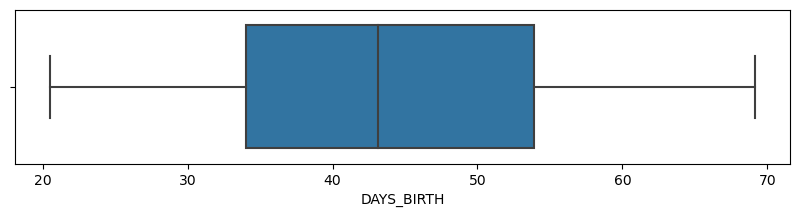

In [84]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data.DAYS_BIRTH);

In [85]:
application_data.DAYS_BIRTH.value_counts() 

37.668493    42
36.934247    42
27.452055    41
49.994521    41
28.197260    40
             ..
68.608219     1
68.895890     1
68.635616     1
21.956164     1
68.660274     1
Name: DAYS_BIRTH, Length: 17458, dtype: int64

In [86]:
application_data['DAYS_BIRTH'] = pd.cut(application_data.DAYS_BIRTH , [0,30,40,50,60,70,999],  labels=['0-30','30-40','40-50','50-60','60-70','70+'])

In [87]:
application_data.DAYS_BIRTH.value_counts(normalize=True)

30-40    0.267518
40-50    0.249090
50-60    0.221553
0-30     0.146101
60-70    0.115739
70+      0.000000
Name: DAYS_BIRTH, dtype: float64

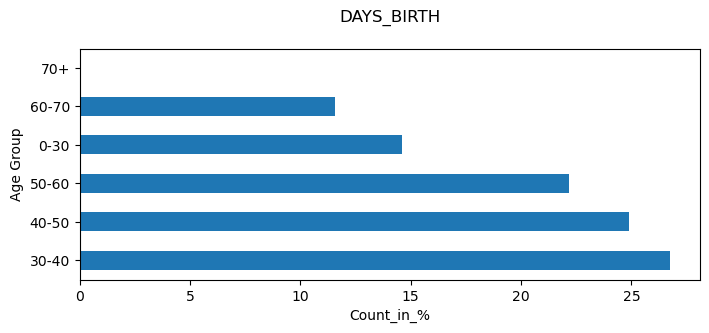

In [88]:
plt.figure(figsize=[8,3])
(100*(application_data.DAYS_BIRTH.value_counts(normalize=True))).plot.barh()
plt.title('DAYS_BIRTH\n')
plt.xlabel('Count_in_%')
plt.ylabel('Age Group');

#### DAYS_EMPLOYED
- Converting to particular age group fr better analysing

In [89]:
pd.cut(application_data.DAYS_EMPLOYED, [0,5,10,20,30,40,1000], labels=['0-5','5-10','10-20','20-30','30-40','40+'])

0           0-5
1           0-5
2           0-5
3          5-10
4          5-10
          ...  
307506      0-5
307507      NaN
307508    20-30
307509    10-20
307510      0-5
Name: DAYS_EMPLOYED, Length: 306207, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-20' < '20-30' < '30-40' < '40+']

In [90]:
application_data['DAYS_EMPLOYED'] = pd.cut(application_data.DAYS_EMPLOYED, [0,5,10,20,30,40,1000], labels=['0-5','5-10','10-20','20-30','30-40','40+'])

In [91]:
application_data.DAYS_EMPLOYED.value_counts()

0-5      135647
5-10      64619
10-20     38242
20-30      9524
30-40      2763
40+         232
Name: DAYS_EMPLOYED, dtype: int64

We converted Day DAYS_EMPLOYED column in order/group vairable for better analysis group wise.

### Points Notable
- More Thane 50% applicants lies between  Income group 1-2.
- Applicants have significant counts of age group between 30-40 & 40-50. 
- We found 55k applicants having employment years more than 1000. It's outlier we ignorethem for analysis.


# Univariate Analysis

### CATEGORICAL ANALYSIS

#### NAME_EDUCATION_TYPE

In [92]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  306207 non-null  int64   
 1   TARGET                      306207 non-null  int64   
 2   NAME_CONTRACT_TYPE          306207 non-null  object  
 3   CODE_GENDER                 306207 non-null  object  
 4   FLAG_OWN_CAR                306207 non-null  object  
 5   FLAG_OWN_REALTY             306207 non-null  object  
 6   CNT_CHILDREN                306207 non-null  int64   
 7   AMT_INCOME_TOTAL            306188 non-null  category
 8   AMT_CREDIT                  306207 non-null  float64 
 9   AMT_ANNUITY                 306206 non-null  category
 10  AMT_GOODS_PRICE             306207 non-null  float64 
 11  NAME_TYPE_SUITE             306207 non-null  object  
 12  NAME_INCOME_TYPE            306207 non-null  object  
 13 

In [93]:
100*(application_data.NAME_EDUCATION_TYPE.value_counts(normalize=True))

Secondary / secondary special    71.056834
Higher education                 24.301535
Incomplete higher                 3.344470
Lower secondary                   1.243930
Academic degree                   0.053232
Name: NAME_EDUCATION_TYPE, dtype: float64

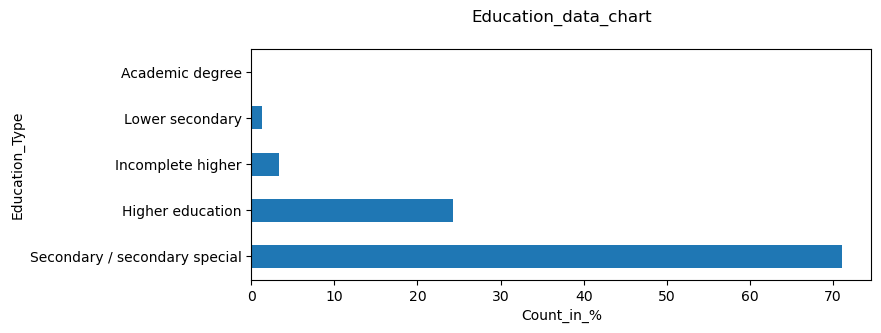

In [94]:
plt.figure(figsize=[8,3])
(100*(application_data.NAME_EDUCATION_TYPE.value_counts(normalize=True))).plot.barh()
plt.title('Education_data_chart\n')
plt.xlabel('Count_in_%')
plt.ylabel('Education_Type');

#### CODE_GENDER

In [95]:
100*(application_data.CODE_GENDER.value_counts(normalize=True))

F    65.850552
M    34.149448
Name: CODE_GENDER, dtype: float64

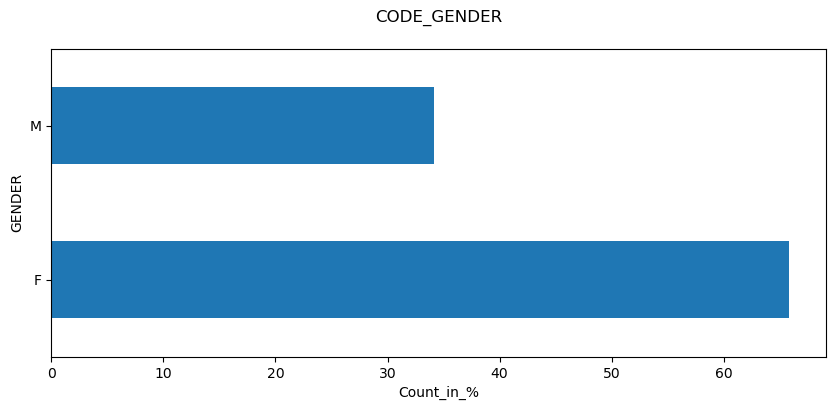

In [96]:
plt.figure(figsize=[10,4])
(100*(application_data.CODE_GENDER.value_counts(normalize=True))).plot.barh()
plt.title('CODE_GENDER\n')
plt.xlabel('Count_in_%')
plt.ylabel('GENDER');

#### FLAG_OWN_CAR

In [97]:
100*(application_data.FLAG_OWN_CAR.value_counts(normalize=True))

N    65.98053
Y    34.01947
Name: FLAG_OWN_CAR, dtype: float64

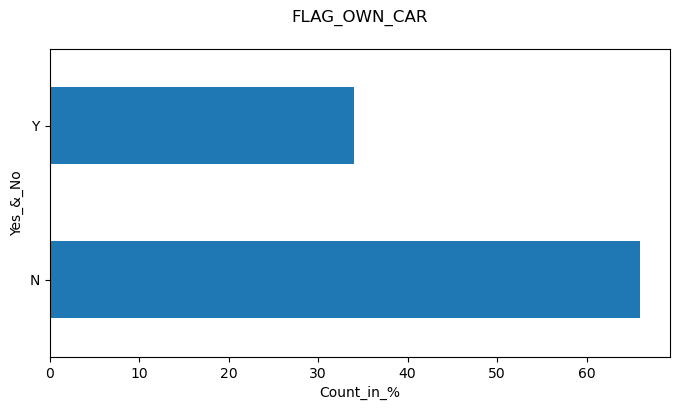

In [98]:
plt.figure(figsize=[8,4])
(100*(application_data.FLAG_OWN_CAR.value_counts(normalize=True))).plot.barh()
plt.title('FLAG_OWN_CAR\n')
plt.xlabel('Count_in_%')
plt.ylabel('Yes_&_No');

#### FLAG_OWN_REALTY

In [99]:
100*(application_data.FLAG_OWN_REALTY.value_counts(normalize=True))

Y    69.509515
N    30.490485
Name: FLAG_OWN_REALTY, dtype: float64

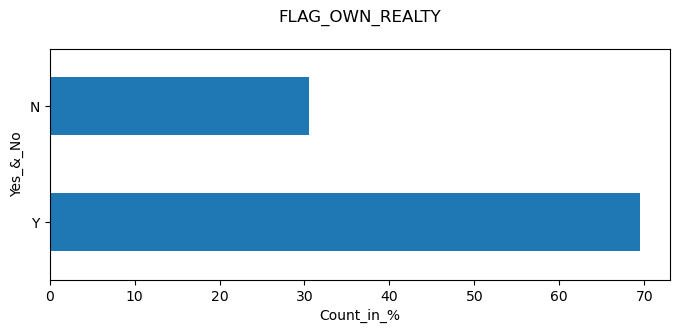

In [100]:
plt.figure(figsize=[8,3])
(100*(application_data.FLAG_OWN_REALTY.value_counts(normalize=True))).plot.barh()
plt.title('FLAG_OWN_REALTY\n')
plt.xlabel('Count_in_%')
plt.ylabel('Yes_&_No');

#### NAME_CONTRACT_TYPE

In [101]:
100*(application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True))

Cash loans         90.531242
Revolving loans     9.468758
Name: NAME_CONTRACT_TYPE, dtype: float64

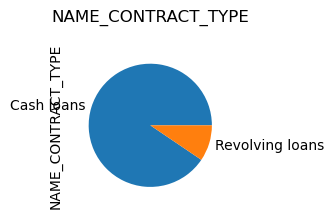

In [102]:
plt.figure(figsize=[4,2])
(100*(application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True))).plot.pie()
plt.title('NAME_CONTRACT_TYPE\n');

#### NAME_TYPE_SUITE

In [103]:
100*(application_data.NAME_TYPE_SUITE.value_counts(normalize=True))

Unaccompanied      81.159151
Family             13.111392
Spouse, partner     3.713174
Children            1.066925
Other_B             0.578040
Other_A             0.282815
Group of people     0.088502
Name: NAME_TYPE_SUITE, dtype: float64

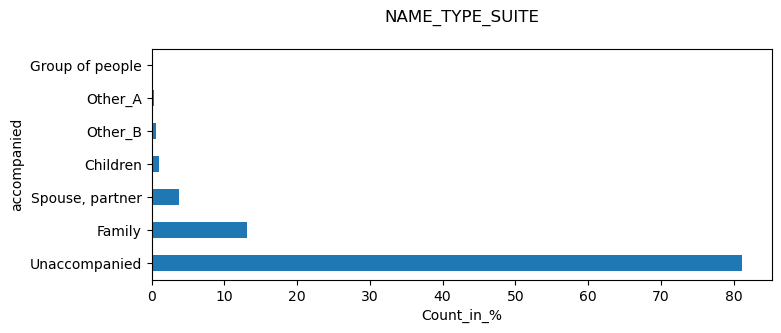

In [104]:
plt.figure(figsize=[8,3])
(100*(application_data.NAME_TYPE_SUITE.value_counts(normalize=True))).plot.barh()
plt.title('NAME_TYPE_SUITE\n')
plt.xlabel('Count_in_%')
plt.ylabel('accompanied');

#### NAME_INCOME_TYPE

In [105]:
100*(application_data.NAME_INCOME_TYPE.value_counts(normalize=True))

Working                 51.640230
Commercial associate    23.269880
Pensioner               18.015264
State servant            7.056991
Unemployed               0.007185
Student                  0.005552
Businessman              0.003266
Maternity leave          0.001633
Name: NAME_INCOME_TYPE, dtype: float64

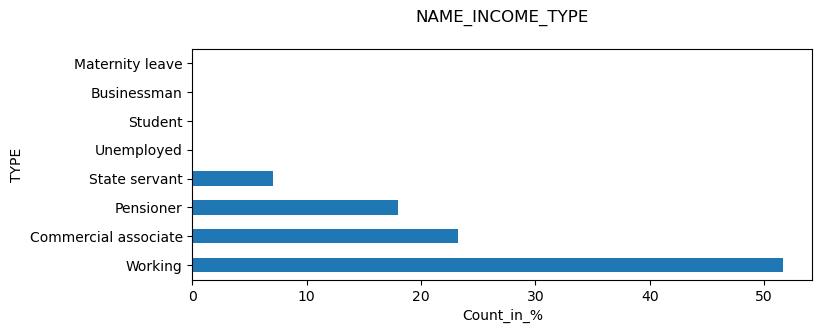

In [106]:
plt.figure(figsize=[8,3])
(100*(application_data.NAME_INCOME_TYPE.value_counts(normalize=True))).plot.barh()
plt.title('NAME_INCOME_TYPE\n')
plt.xlabel('Count_in_%')
plt.ylabel('TYPE');

#### NAME_FAMILY_STATUS

In [107]:
100*(application_data.NAME_FAMILY_STATUS.value_counts(normalize=True))

Married                 63.891746
Single / not married    14.760277
Civil marriage           9.685931
Separated                6.431924
Widow                    5.230122
Name: NAME_FAMILY_STATUS, dtype: float64

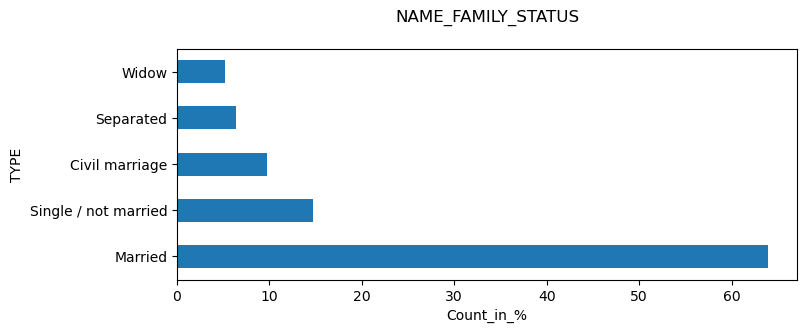

In [108]:
plt.figure(figsize=[8,3])
(100*(application_data.NAME_FAMILY_STATUS.value_counts(normalize=True))).plot.barh()
plt.title('NAME_FAMILY_STATUS\n')
plt.xlabel('Count_in_%')
plt.ylabel('TYPE');

#### ORGANIZATION_TYPE

In [109]:
100*(application_data.ORGANIZATION_TYPE.value_counts(normalize=True))

Business Entity Type 3    22.103675
XNA                       18.019836
Self-employed             12.493509
Other                      5.428027
Medicine                   3.639368
Business Entity Type 2     3.431992
Government                 3.382026
School                     2.892161
Trade: type 7              2.546643
Kindergarten               2.238029
Construction               2.185450
Business Entity Type 1     1.947049
Transport: type 4          1.755022
Trade: type 3              1.133547
Industry: type 9           1.092398
Industry: type 3           1.067578
Security                   1.054189
Housing                    0.960461
Industry: type 11          0.881103
Military                   0.855957
Bank                       0.811216
Agriculture                0.798806
Police                     0.761250
Transport: type 2          0.715529
Postal                     0.702793
Security Ministries        0.641723
Trade: type 2              0.616250
Restaurant                 0

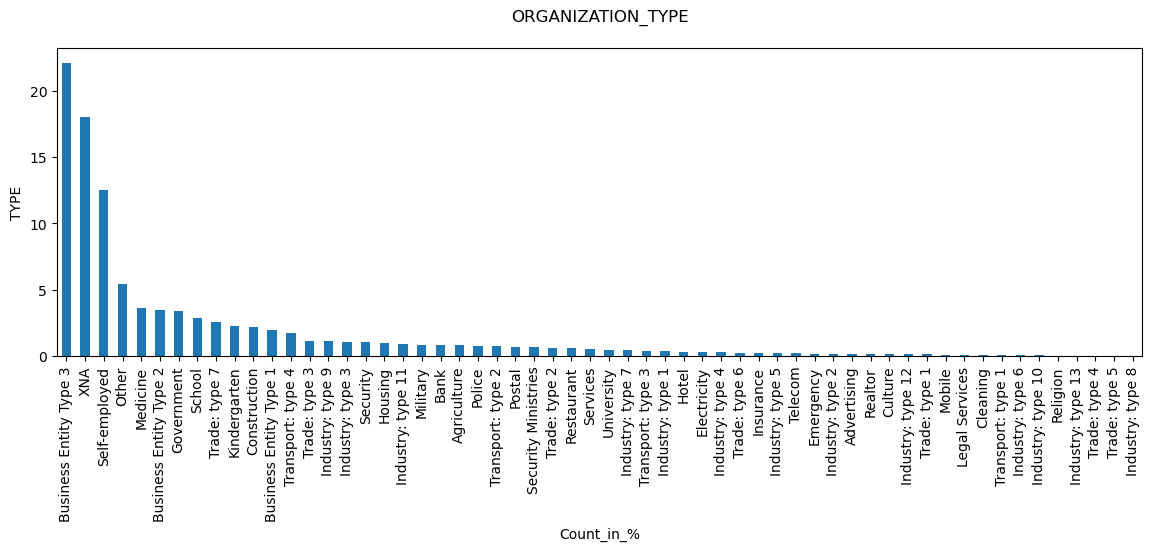

In [110]:
plt.figure(figsize=[14,4])
(100*(application_data.ORGANIZATION_TYPE.value_counts(normalize=True))).plot.bar()
plt.title('ORGANIZATION_TYPE\n')
plt.xlabel('Count_in_%')
plt.ylabel('TYPE');

### Following Point Notes in Categorical Univariate Analysis
- Almost 70% counts having secondary/secondary special condition. Highter Education counts is 25%
- 65% count is Female
- 65 to 70% applicants don't have car/own property
- 90% is cash loan & 10% is revolving loans
- More than 80% applicants is unaccompined while appliy loan & only 13% come with family
- 50% are working, 23% are commerical associate, 18% aer pensioners
- 64% persons are married
- 23% are have oraganization type is Business Entity Type 3 & 18% info not availabe

### NUMERICAL UNIVARIATE ANALYSIS

#### DAYS_BIRTH
- Coverting Day's Birth to particular age group

In [111]:
application_data.DAYS_BIRTH.value_counts() 

30-40    81916
40-50    76273
50-60    67841
0-30     44737
60-70    35440
70+          0
Name: DAYS_BIRTH, dtype: int64

In [112]:
application_data['DAYS_BIRTH'] = pd.cut(application_data.DAYS_BIRTH , [0,30,40,50,60,70,999],  labels=['0-30','30-40','40-50','50-60','60-70','70+'])

TypeError: '<' not supported between instances of 'int' and 'str'

In [113]:
application_data.DAYS_BIRTH.value_counts(normalize=True)

30-40    0.267518
40-50    0.249090
50-60    0.221553
0-30     0.146101
60-70    0.115739
70+      0.000000
Name: DAYS_BIRTH, dtype: float64

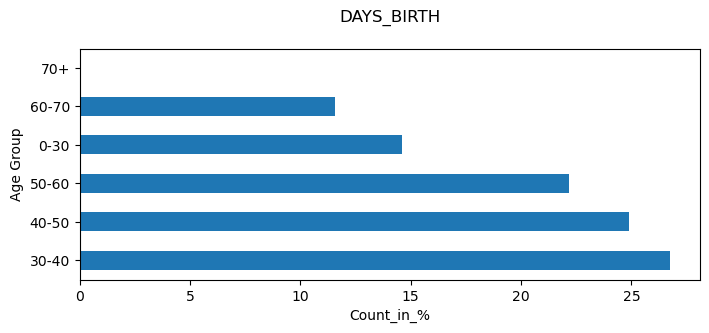

In [114]:
plt.figure(figsize=[8,3])
(100*(application_data.DAYS_BIRTH.value_counts(normalize=True))).plot.barh()
plt.title('DAYS_BIRTH\n')
plt.xlabel('Count_in_%')
plt.ylabel('Age Group');

#### DAYS_EMPLOYED
- Converting to particular age group fr better analysing

In [115]:
pd.cut(application_data.DAYS_EMPLOYED, [0,5,10,20,30,40,1000], labels=['0-5','5-10','10-20','20-30','30-40','40+'])

TypeError: '<' not supported between instances of 'int' and 'str'

In [116]:
application_data['DAYS_EMPLOYED'] = pd.cut(application_data.DAYS_EMPLOYED, [0,5,10,20,30,40,1000], labels=['0-5','5-10','10-20','20-30','30-40','40+'])

TypeError: '<' not supported between instances of 'int' and 'str'

In [118]:
application_data.DAYS_EMPLOYED.value_counts()

0-5      135647
5-10      64619
10-20     38242
20-30      9524
30-40      2763
40+         232
Name: DAYS_EMPLOYED, dtype: int64

We converted Day DAYS_EMPLOYED column in order/group vairable for better analysis group wise.

# Data Imbalance

In [119]:
100*(application_data.TARGET.value_counts(normalize=True))

0    91.9156
1     8.0844
Name: TARGET, dtype: float64

- target_0 = List of Non Defaulters 
- target_1 = List of Defaulters


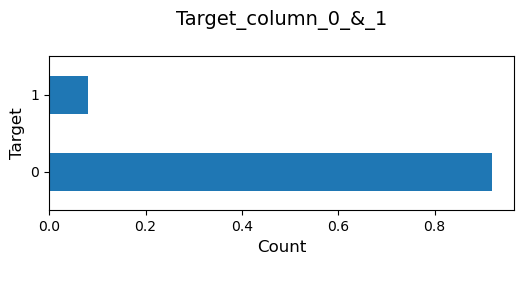

In [120]:
plt.figure(figsize=[6,2])
application_data.TARGET.value_counts(normalize=True).plot.barh()
plt.xlabel('Count\n', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.title('Target_column_0_&_1\n', fontsize = 14);

###### As per above chart Data Imbalanced Deteced.

In [121]:
target_0 = application_data[application_data['TARGET']==0] 
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,5000-10000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,50-60,0-5,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,1-2,312682.5,25000-30000,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,50-60,5-10,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,1-2,513000.0,20000-25000,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,50-60,5-10,11.810959,9.473973,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,100008,0,Cash loans,M,N,Y,0,0.5-1,490495.5,25000-30000,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,40-50,0-5,13.616438,1.306849,2.0,WEDNESDAY,16,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,1.000000,1.000000


In [122]:
target_1 = application_data[application_data['TARGET']==1 ]
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0-30,0-5,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,1-2,979992.0,25000-30000,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,50-60,5-10,18.008219,5.005479,1.0,MONDAY,9,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0,1,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,2-3,1193580.0,35000+,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-50,0-5,3.238356,2.819178,2.0,TUESDAY,9,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,1-2,288873.0,15000-20000,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,30-40,5-10,0.123288,12.079452,2.0,THURSDAY,11,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,0.5-1,252000.0,10000-15000,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,60-70,NaN,14.769863,11.504110,2.0,THURSDAY,10,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
target_0_cat = target_0.select_dtypes(include=['object']).columns
target_0_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [124]:
target_1_cat = target_1.select_dtypes(include=['object']).columns
target_1_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

# SEGMENTED UNIVARIATE ANALYSIS WITH target_0

In [125]:
target_0.CODE_GENDER.value_counts(normalize=True)

F    0.666241
M    0.333759
Name: CODE_GENDER, dtype: float64

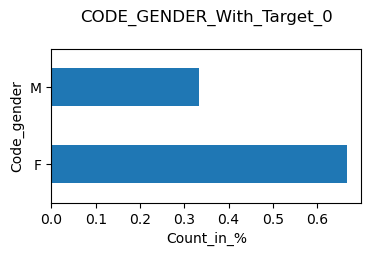

In [126]:
plt.figure(figsize=[4,2])
target_0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.title('CODE_GENDER_With_Target_0\n')
plt.xlabel('Count_in_%')
plt.ylabel('Code_gender');

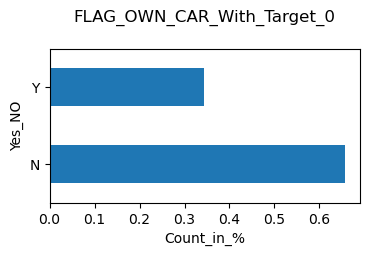

In [127]:
plt.figure(figsize=[4,2])
target_0.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.title('FLAG_OWN_CAR_With_Target_0\n')
plt.xlabel('Count_in_%')
plt.ylabel('Yes_NO');

In [128]:
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703871
Higher education                 0.250213
Incomplete higher                0.033295
Lower secondary                  0.012052
Academic degree                  0.000568
Name: NAME_EDUCATION_TYPE, dtype: float64

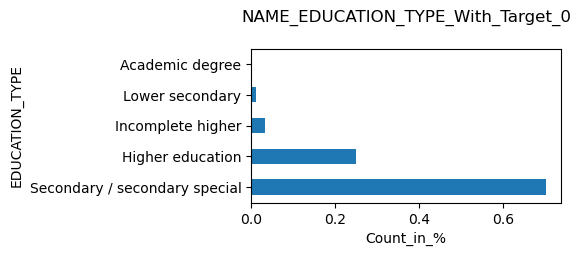

In [129]:
plt.figure(figsize=[4,2])
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('NAME_EDUCATION_TYPE_With_Target_0\n')
plt.xlabel('Count_in_%')
plt.ylabel('EDUCATION_TYPE');

In [130]:
target_0.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.642518
Single / not married    0.144788
Civil marriage          0.094879
Separated               0.064235
Widow                   0.053579
Name: NAME_FAMILY_STATUS, dtype: float64

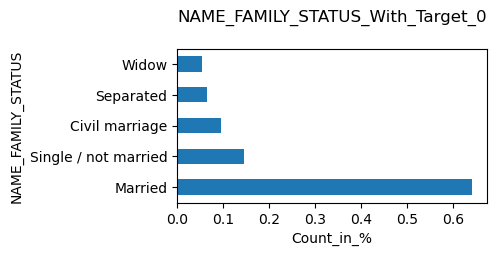

In [131]:
plt.figure(figsize=[4,2])
target_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('NAME_FAMILY_STATUS_With_Target_0\n')
plt.xlabel('Count_in_%')
plt.ylabel('NAME_FAMILY_STATUS');

In [132]:
target_0.DAYS_BIRTH.value_counts(normalize=True)

30-40    0.263079
40-50    0.250256
50-60    0.226273
0-30     0.140685
60-70    0.119708
70+      0.000000
Name: DAYS_BIRTH, dtype: float64

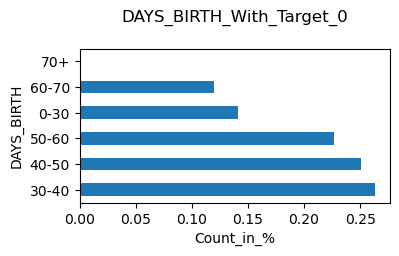

In [133]:
plt.figure(figsize=[4,2])
target_0.DAYS_BIRTH.value_counts(normalize=True).plot.barh()
plt.title('DAYS_BIRTH_With_Target_0\n')
plt.xlabel('Count_in_%')
plt.ylabel('DAYS_BIRTH');

#### AMT_INCOME_TOTAL

In [134]:
target_0.AMT_INCOME_TOTAL.value_counts(normalize=True)

1-2      0.504497
2-3      0.213218
0.5-1    0.192034
3-4      0.048739
4-5      0.017809
0-0.5    0.014757
6+       0.005340
5-6      0.003607
Name: AMT_INCOME_TOTAL, dtype: float64

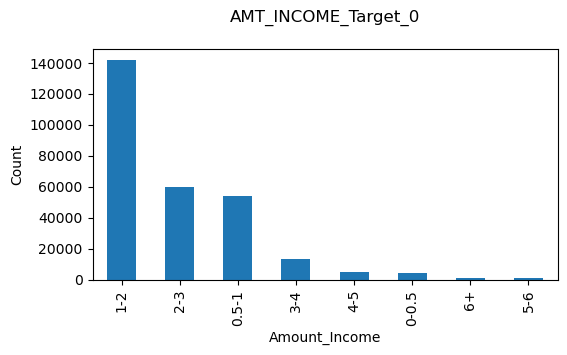

In [135]:
plt.figure(figsize=[6,3])
target_0.AMT_INCOME_TOTAL.value_counts().plot.bar();
plt.title('AMT_INCOME_Target_0\n')
plt.xlabel('Amount_Income')
plt.ylabel('Count');

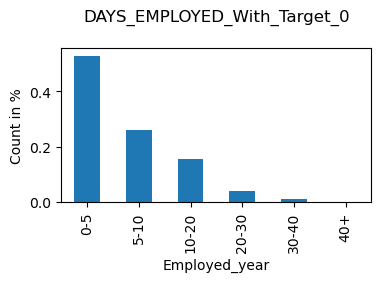

In [136]:
plt.figure(figsize=[4,2])
target_0.DAYS_EMPLOYED.value_counts(normalize=True).plot.bar()
plt.title('DAYS_EMPLOYED_With_Target_0\n')
plt.xlabel('Employed_year')
plt.ylabel('Count in %');

In [137]:
(application_data.DAYS_EMPLOYED.value_counts(normalize=True))*100

0-5      54.036817
5-10     25.741852
10-20    15.234218
20-30     3.794014
30-40     1.100678
40+       0.092420
Name: DAYS_EMPLOYED, dtype: float64

In [138]:
target_0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.218066
XNA                       0.185456
Self-employed             0.122074
Other                     0.054528
Medicine                  0.036987
Government                0.034219
Business Entity Type 2    0.034162
School                    0.029597
Trade: type 7             0.025077
Kindergarten              0.022640
Construction              0.020991
Business Entity Type 1    0.019456
Transport: type 4         0.017314
Industry: type 9          0.011089
Trade: type 3             0.011057
Industry: type 3          0.010382
Security                  0.010325
Housing                   0.009618
Military                  0.008833
Industry: type 11         0.008755
Bank                      0.008367
Police                    0.007866
Agriculture               0.007785
Transport: type 2         0.007181
Postal                    0.007003
Security Ministries       0.006641
Trade: type 2             0.006236
Restaurant                0.005649
Services            

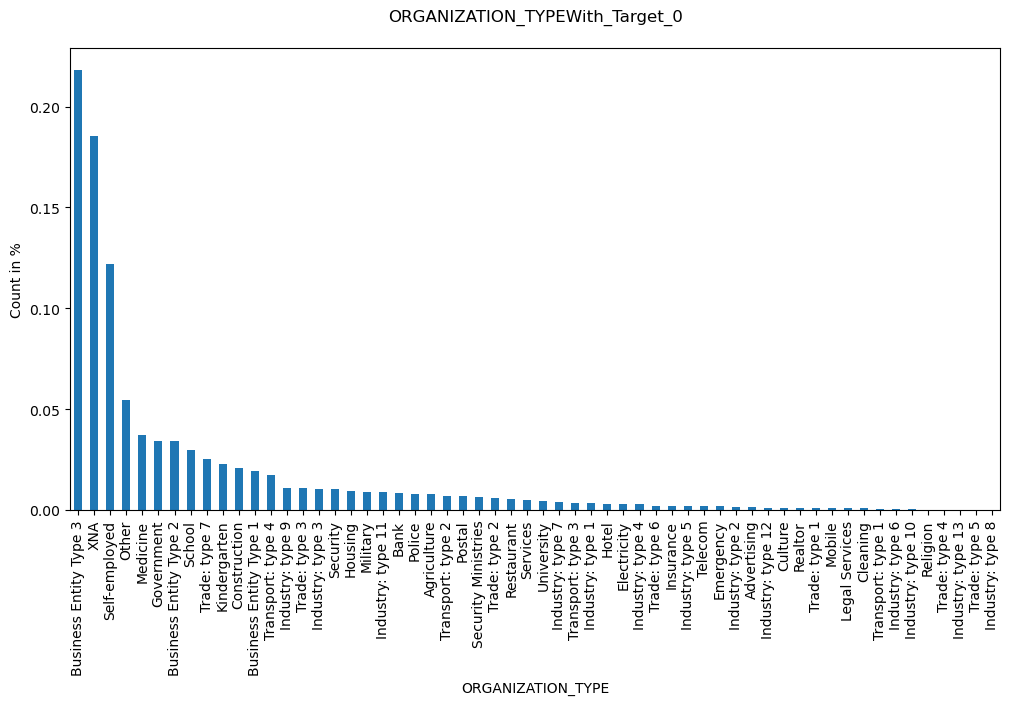

In [139]:
plt.figure(figsize=[12,6])
target_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('ORGANIZATION_TYPEWith_Target_0\n')
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Count in %');

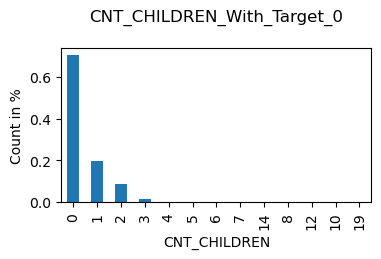

In [140]:
plt.figure(figsize=[4,2])
target_0.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.title('CNT_CHILDREN_With_Target_0\n')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count in %');

In [141]:
application_data.AMT_ANNUITY.value_counts()

35000+         74634
20000-25000    48161
25000-30000    43959
15000-20000    42618
10000-15000    40135
30000-35000    33575
5000-10000     21986
0-5000          1138
Name: AMT_ANNUITY, dtype: int64

In [142]:
target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.902605
Revolving loans    0.097395
Name: NAME_CONTRACT_TYPE, dtype: float64

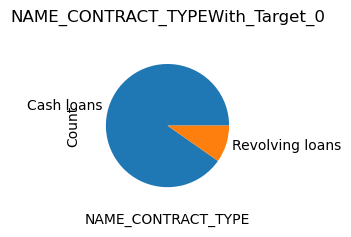

In [143]:
plt.figure(figsize=[4,2])
target_0.NAME_CONTRACT_TYPE.value_counts().plot.pie()
plt.title('NAME_CONTRACT_TYPEWith_Target_0\n')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count');

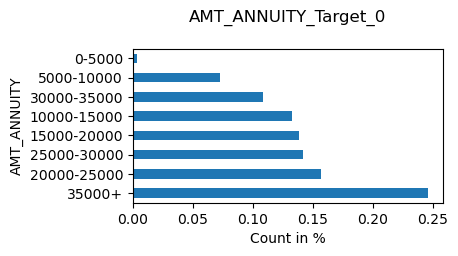

In [144]:
plt.figure(figsize=[4,2])
target_0.AMT_ANNUITY.value_counts(normalize=True).plot.barh()
plt.title('AMT_ANNUITY_Target_0\n')
plt.xlabel('Count in %')
plt.ylabel('AMT_ANNUITY');

# SEGMENTED UNIVARIATE ANALYSIS WITH target_1

In [145]:
target_1.CODE_GENDER.value_counts(normalize=True)

F    0.570551
M    0.429449
Name: CODE_GENDER, dtype: float64

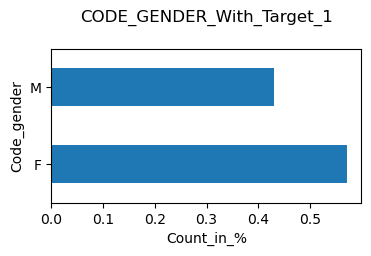

In [146]:
plt.figure(figsize=[4,2])
target_1.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.title('CODE_GENDER_With_Target_1\n')
plt.xlabel('Count_in_%')
plt.ylabel('Code_gender');

In [147]:
target_1.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.694607
Y    0.305393
Name: FLAG_OWN_CAR, dtype: float64

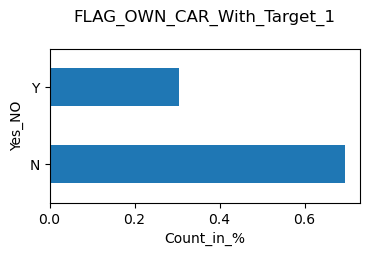

In [148]:
plt.figure(figsize=[4,2])
target_1.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.title('FLAG_OWN_CAR_With_Target_1\n')
plt.xlabel('Count_in_%')
plt.ylabel('Yes_NO');

In [149]:
target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786710
Higher education                 0.161180
Incomplete higher                0.035144
Lower secondary                  0.016845
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

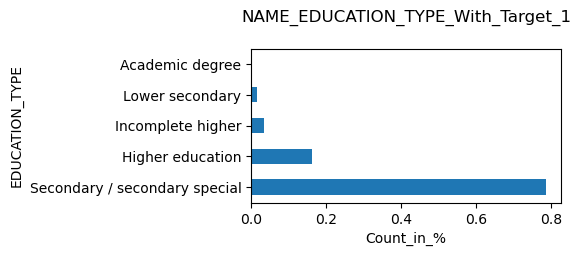

In [150]:
plt.figure(figsize=[4,2])
target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('NAME_EDUCATION_TYPE_With_Target_1\n')
plt.xlabel('Count_in_%')
plt.ylabel('EDUCATION_TYPE');

In [151]:
target_1.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.59798
Single / not married    0.17960
Civil marriage          0.11937
Separated               0.06528
Widow                   0.03777
Name: NAME_FAMILY_STATUS, dtype: float64

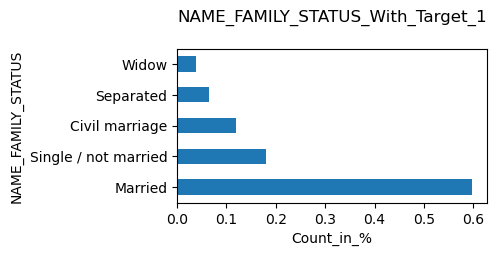

In [152]:
plt.figure(figsize=[4,2])
target_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('NAME_FAMILY_STATUS_With_Target_1\n')
plt.xlabel('Count_in_%')
plt.ylabel('NAME_FAMILY_STATUS');

In [153]:
target_1.DAYS_BIRTH.value_counts(normalize=True)

30-40    0.317996
40-50    0.235831
0-30     0.207675
50-60    0.167885
60-70    0.070612
70+      0.000000
Name: DAYS_BIRTH, dtype: float64

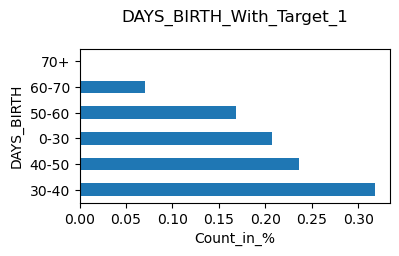

In [154]:
plt.figure(figsize=[4,2])
target_1.DAYS_BIRTH.value_counts(normalize=True).plot.barh()
plt.title('DAYS_BIRTH_With_Target_1\n')
plt.xlabel('Count_in_%')
plt.ylabel('DAYS_BIRTH');

#### AMT_INCOME_TOTAL

In [155]:
target_1.AMT_INCOME_TOTAL.value_counts(normalize=True)

1-2      0.536905
2-3      0.198198
0.5-1    0.196623
3-4      0.035672
0-0.5    0.013817
4-5      0.012968
6+       0.003030
5-6      0.002788
Name: AMT_INCOME_TOTAL, dtype: float64

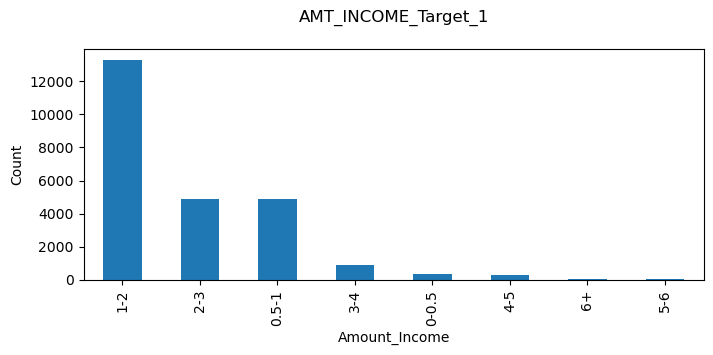

In [156]:
plt.figure(figsize=[8,3])
target_1.AMT_INCOME_TOTAL.value_counts().plot.bar();
plt.title('AMT_INCOME_Target_1\n')
plt.xlabel('Amount_Income')
plt.ylabel('Count');

In [157]:
target_1.DAYS_EMPLOYED.value_counts(normalize=True)

0-5      0.659854
5-10     0.219216
10-20    0.096863
20-30    0.019611
30-40    0.004409
40+      0.000046
Name: DAYS_EMPLOYED, dtype: float64

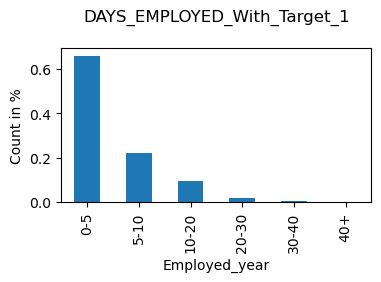

In [158]:
plt.figure(figsize=[4,2])
target_1.DAYS_EMPLOYED.value_counts(normalize=True).plot.bar()
plt.title('DAYS_EMPLOYED_With_Target_1\n')
plt.xlabel('Employed_year')
plt.ylabel('Count in %');

In [159]:
target_1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.254817
Self-employed             0.157463
XNA                       0.120420
Other                     0.051464
Business Entity Type 2    0.036114
Construction              0.031670
Trade: type 7             0.029893
Medicine                  0.029651
Government                0.029287
School                    0.021248
Transport: type 4         0.020238
Business Entity Type 1    0.019632
Kindergarten              0.019430
Trade: type 3             0.014502
Industry: type 3          0.014017
Security                  0.013007
Agriculture               0.010301
Housing                   0.009453
Industry: type 11         0.009453
Industry: type 9          0.009049
Restaurant                0.008483
Transport: type 3         0.007554
Postal                    0.007312
Transport: type 2         0.006867
Military                  0.005453
Trade: type 2             0.005332
Bank                      0.005211
Police                    0.004726
Industry: type 1    

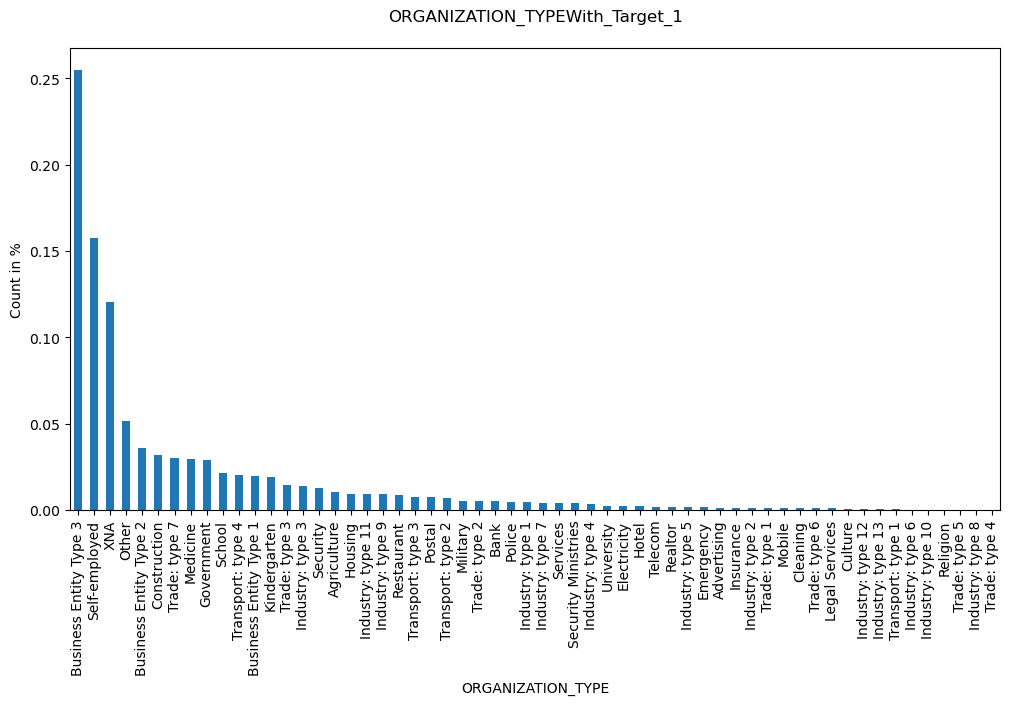

In [160]:
plt.figure(figsize=[12,6])
target_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('ORGANIZATION_TYPEWith_Target_1\n')
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Count in %');

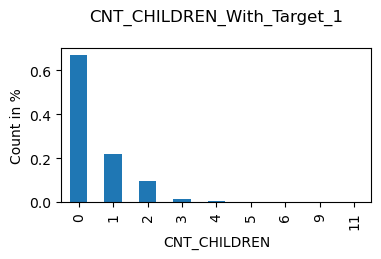

In [161]:
plt.figure(figsize=[4,2])
target_1.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.title('CNT_CHILDREN_With_Target_1\n')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count in %');

In [162]:
target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.936094
Revolving loans    0.063906
Name: NAME_CONTRACT_TYPE, dtype: float64

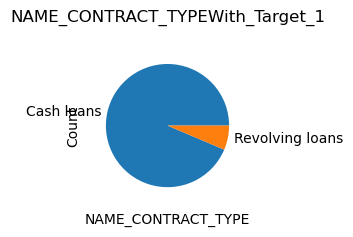

In [163]:
plt.figure(figsize=[4,2])
target_1.NAME_CONTRACT_TYPE.value_counts().plot.pie()
plt.title('NAME_CONTRACT_TYPEWith_Target_1\n')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count');

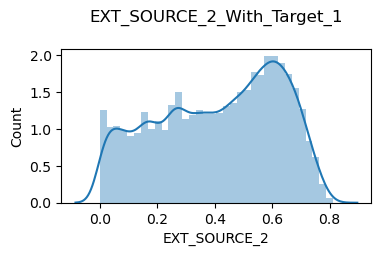

In [164]:
plt.figure(figsize=[4,2])
sns.distplot(target_1.EXT_SOURCE_2)
plt.title('EXT_SOURCE_2_With_Target_1\n')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Count');

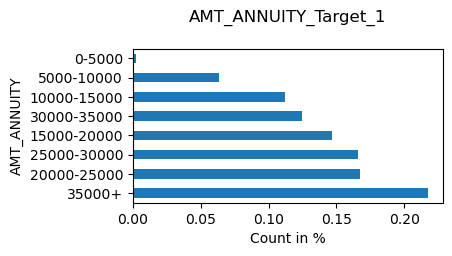

In [165]:
plt.figure(figsize=[4,2])
target_1.AMT_ANNUITY.value_counts(normalize=True).plot.barh()
plt.title('AMT_ANNUITY_Target_1\n')
plt.xlabel('Count in %')
plt.ylabel('AMT_ANNUITY');

In [166]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0-30,0-5,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,5000-10000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,50-60,0-5,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,1-2,312682.5,25000-30000,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,50-60,5-10,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878
4,100007,0,Cash loans,M,N,Y,0,1-2,513000.0,20000-25000,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,50-60,5-10,11.810959,9.473973,1.0,THURSDAY,11,0,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000


### Points from Segmented Univariate Analysis

-CODE_GENDER: Mens are more defaulter than women

-EDUCATION_TYPE: More than 75% applicants are from secondary Education. Also more thane 80% are defaulter from secondary eductions    

-FLAG_OWN_CAR: 30% are defaulters are owm cars

-NAME_FAMILY_STATUS: Married applicants defaulters count is 60%

-DAYS_BIRTH: In Target_0 age group 30-40 & 40-50 almost have same share but in target_1 age group 30-40 is likely to defaulters.

-DAYS_EMPLOYED: large numbers of outliers in this columns around 55000 so we can not predict from this column.

-AMT_INCOME_TOTAL: Group 1-2 lac having higher count in both defaulter & non defaulters.

-ORGANIZATION_TYPE: For Non defaulters higher count is Business Entity Type 3, following them with XNA & Self-employed.
But Business Entity Type 3 also having higher % of defaulters. XNA count have lower % in defaulters.

-NAME_CONTRACT_TYPE: Cash loan % count is more than 90% in both defaulters & non defaulters.

-EXT_SOURCE_2 : It shows that good score in non Defaulters

-AMT_ANNUITY: Defaulter count haveing annuity more thae 35000+



# Previous Application

In [167]:
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
previous_app.shape

(1670214, 37)

### Handling Missing Values of Previous application column

In [169]:
temp_1 = (100*(previous_app.isnull().sum()/previous_app.shape[0])).reset_index().rename(columns={'index':'column_name', 0 :'%missing'})
temp_1

,column_name,%missing
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [170]:
temp_1[temp_1['%missing']>20].shape

(14, 2)

Dropping column which having NaN values more than 20%

In [171]:
drop_column_1 = list(temp_1[temp_1['%missing']>=20]['column_name'])
drop_column_1

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [172]:
previous_app = previous_app.drop(drop_column_1, axis=1)

In [173]:
previous_app.shape # check.

(1670214, 23)

In [174]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [175]:
previous_app.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [176]:
previous_app[previous_app.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,NaN,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,XNA,Card Street


In [177]:
previous_app =  previous_app [~(previous_app['AMT_CREDIT'].isnull())]    # Dropping single row of AMT_CREDIT column

In [178]:
previous_app.shape

(1670213, 23)

In [179]:
previous_app.PRODUCT_COMBINATION.value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067419
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014422
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [180]:
previous_app[previous_app.PRODUCT_COMBINATION.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6664,2515161,222844,XNA,0.0,0.0,SATURDAY,8,Y,1,XAP,Canceled,-351,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,10,Connectivity,XNA,NaN
9029,1851920,417884,XNA,0.0,0.0,MONDAY,13,Y,1,XAP,Canceled,-291,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,XNA,NaN
17038,2389511,148922,XNA,0.0,0.0,TUESDAY,6,Y,1,XAP,Canceled,-395,XNA,XAP,New,XNA,XNA,XNA,Country-wide,20,Connectivity,XNA,NaN
24543,2494449,366626,XNA,0.0,0.0,WEDNESDAY,13,Y,1,XAP,Canceled,-418,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,41,Connectivity,XNA,NaN
24574,2781877,394843,XNA,0.0,0.0,SATURDAY,6,Y,1,XAP,Canceled,-601,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,42,Connectivity,XNA,NaN
25030,2785890,154490,XNA,0.0,0.0,TUESDAY,21,Y,1,XAP,Canceled,-516,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,35,Connectivity,XNA,NaN
39305,2457349,307803,XNA,0.0,0.0,WEDNESDAY,15,Y,1,XAP,Canceled,-307,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,50,Connectivity,XNA,NaN
39461,2456391,164367,XNA,0.0,0.0,SUNDAY,13,Y,1,XAP,Canceled,-338,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,55,Connectivity,XNA,NaN
52461,2447432,426909,XNA,0.0,0.0,THURSDAY,16,Y,1,XAP,Canceled,-344,XNA,XAP,New,XNA,XNA,XNA,Country-wide,30,Connectivity,XNA,NaN
61664,2022193,378447,XNA,0.0,0.0,THURSDAY,13,Y,1,XAP,Canceled,-476,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,50,Connectivity,XNA,NaN


PRODUCT_COMBINATION Nan values we seen that on other column such as NAME_YIELD_GROUP,NAME_PRODUCT_TYPE,NAME_PORTFOLIO,NAME_PORTFOLIO,NAME_GOODS_CATEGORY,NAME_PAYMENT_TYPE,NAME_CONTRACT_TYPE
also have XNA values. Checkig fews of these columns.
& Dropping all rows of PRODUCT_COMBINATION NaN values.

In [181]:
previous_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436562
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [182]:
previous_app.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [183]:
previous_app.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309669
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64

Droppping Nan Values of PRODUCT_COMBINATION

In [210]:
previous_app =  previous_app [~(previous_app['PRODUCT_COMBINATION'].isnull())]

In [211]:
previous_app.shape

(1669867, 23)

In [184]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670213 non-null  int64  
 1   SK_ID_CURR                   1670213 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670213 non-null  object 
 3   AMT_APPLICATION              1670213 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670213 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670213 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670213 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670213 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670213 non-null  object 
 10  NAME_CONTRACT_STATUS         1670213 non-null  object 
 11  DAYS_DECISION                1670213 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670213 non-n

## Cleaning & Handling Previous app data set

In [185]:
previous_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436562
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [186]:
previous_app.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150907
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [187]:
previous_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

More than 90% XAP XAN values so we will drop this column

In [188]:
previous_app.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

In [189]:
previous_app.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

More than 37% XAN values & we canot replace these values with other beacuxe count is huge
We will drop these column

In [190]:
previous_app.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.810131
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

CODE_REJECT_REASON: 80% values are XAP we will drop these values

In [191]:
for i in previous_app.columns:
    if previous_app[i].dtypes=='object':
        print(previous_app[i].value_counts(normalize=True))
        print('\n\n')

Cash loans         0.447579
Consumer loans     0.436562
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64



TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150907
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of elect

From above code we will drop below mentioned column NAME_CASH_LOAN_PURPOSE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY
Because XAN/XAP counts are to high more than 50%

WEEKDAY_APPR_PROCESS_START also dropping these column, it's not useful in analysis

Checking Int & float Columns

In [192]:
previous_app.HOUR_APPR_PROCESS_START.describe()

count    1.670213e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [193]:
previous_app.NFLAG_LAST_APPL_IN_DAY.describe()

count    1.670213e+06
mean     9.964675e-01
std      5.932965e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [194]:
previous_app.DAYS_DECISION.describe()

count    1.670213e+06
mean    -8.806798e+02
std      7.790999e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [195]:
previous_app.SELLERPLACE_AREA.describe()

count    1.670213e+06
mean     3.139513e+02
std      7.127446e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

### Dropping Unwanted Column As Mentioned.

In [196]:
previous_app.shape

(1670213, 23)

In [197]:
dropcolumn = ['NAME_PAYMENT_TYPE','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','WEEKDAY_APPR_PROCESS_START']

In [198]:
previous_app.drop(dropcolumn, axis=1, inplace=True)

In [199]:
previous_app.shape

(1670213, 16)

In [200]:
previous_app.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,15,Y,1,Approved,-73,Repeater,POS,Country-wide,35,middle,POS mobile with interest


In [201]:
application_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0-30,0-5,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0


# Merging Application_Data & Previous_Data set

In [202]:
merge_data = pd.merge(application_data, previous_app, how = 'left', on = 'SK_ID_CURR')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0-30,0-5,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,179055.0,179055.0,9.0,Y,1.0,Approved,-606.0,New,POS,Stone,500.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,900000.0,1035882.0,12.0,Y,1.0,Approved,-746.0,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,337500.0,348637.5,17.0,Y,1.0,Approved,-828.0,Refreshed,POS,Stone,1400.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,68809.5,68053.5,15.0,Y,1.0,Approved,-2341.0,Refreshed,POS,Country-wide,200.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,5000-10000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,50-60,0-5,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,24282.0,20106.0,5.0,Y,1.0,Approved,-815.0,New,POS,Regional / Local,30.0,middle,POS mobile without interest


In [203]:
merge_data.shape

(1426030, 55)

# Bivariate Analysis on merge_data

In [204]:
(merge_data.TARGET.value_counts(normalize=True))*100

0    91.372412
1     8.627588
Name: TARGET, dtype: float64

In [205]:
merg_tar_0 = merge_data[merge_data['TARGET']==0]
merg_tar_1 = merge_data[merge_data['TARGET']==1]

In [206]:
merg_tar_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,1810518.0,Cash loans,900000.0,1035882.0,12.0,Y,1.0,Approved,-746.0,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,2636178.0,Consumer loans,337500.0,348637.5,17.0,Y,1.0,Approved,-828.0,Refreshed,POS,Stone,1400.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,2-3,1293502.5,35000+,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,40-50,0-5,3.249315,0.797260,2.0,MONDAY,11,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.000000,0.000000,2396755.0,Consumer loans,68809.5,68053.5,15.0,Y,1.0,Approved,-2341.0,Refreshed,POS,Country-wide,200.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,0.5-1,135000.0,5000-10000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,50-60,0-5,11.671233,6.934247,1.0,MONDAY,9,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1564014.0,Consumer loans,24282.0,20106.0,5.0,Y,1.0,Approved,-815.0,New,POS,Regional / Local,30.0,middle,POS mobile without interest
5,100006,0,Cash loans,F,N,Y,0,1-2,312682.5,25000-30000,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,50-60,5-10,26.939726,6.676712,2.0,WEDNESDAY,17,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,0,1,0.0,0.0,0.0,0.0,0.265697,1.903878,2078043.0,Cash loans,675000.0,675000.0,15.0,Y,1.0,Approved,-181.0,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash X-Sell: low


In [207]:
merg_tar_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,2-3,406597.5,20000-25000,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0-30,0-5,9.994521,5.808219,1.0,WEDNESDAY,10,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,179055.0,179055.0,9.0,Y,1.0,Approved,-606.0,New,POS,Stone,500.0,low_normal,POS other with interest
97,100031,1,Cash loans,F,N,Y,0,1-2,979992.0,25000-30000,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,50-60,5-10,18.008219,5.005479,1.0,MONDAY,9,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0,1,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,100047,1,Cash loans,M,N,Y,0,2-3,1193580.0,35000+,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-50,0-5,3.238356,2.819178,2.0,TUESDAY,9,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,2.0,0.0,4.0,1472630.0,Revolving loans,0.0,450000.0,14.0,Y,1.0,Approved,-1172.0,Repeater,Cards,Credit and cash offices,-1.0,XNA,Card X-Sell
164,100047,1,Cash loans,M,N,Y,0,2-3,1193580.0,35000+,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-50,0-5,3.238356,2.819178,2.0,TUESDAY,9,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,2.0,0.0,4.0,2426800.0,Cash loans,157500.0,157500.0,15.0,Y,1.0,Approved,-1467.0,Refreshed,Cash,Credit and cash offices,-1.0,high,Cash X-Sell: high
165,100047,1,Cash loans,M,N,Y,0,2-3,1193580.0,35000+,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-50,0-5,3.238356,2.819178,2.0,TUESDAY,9,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,2.0,0.0,4.0,1021215.0,Cash loans,675000.0,744498.0,11.0,Y,1.0,Refused,-1075.0,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash Street: low


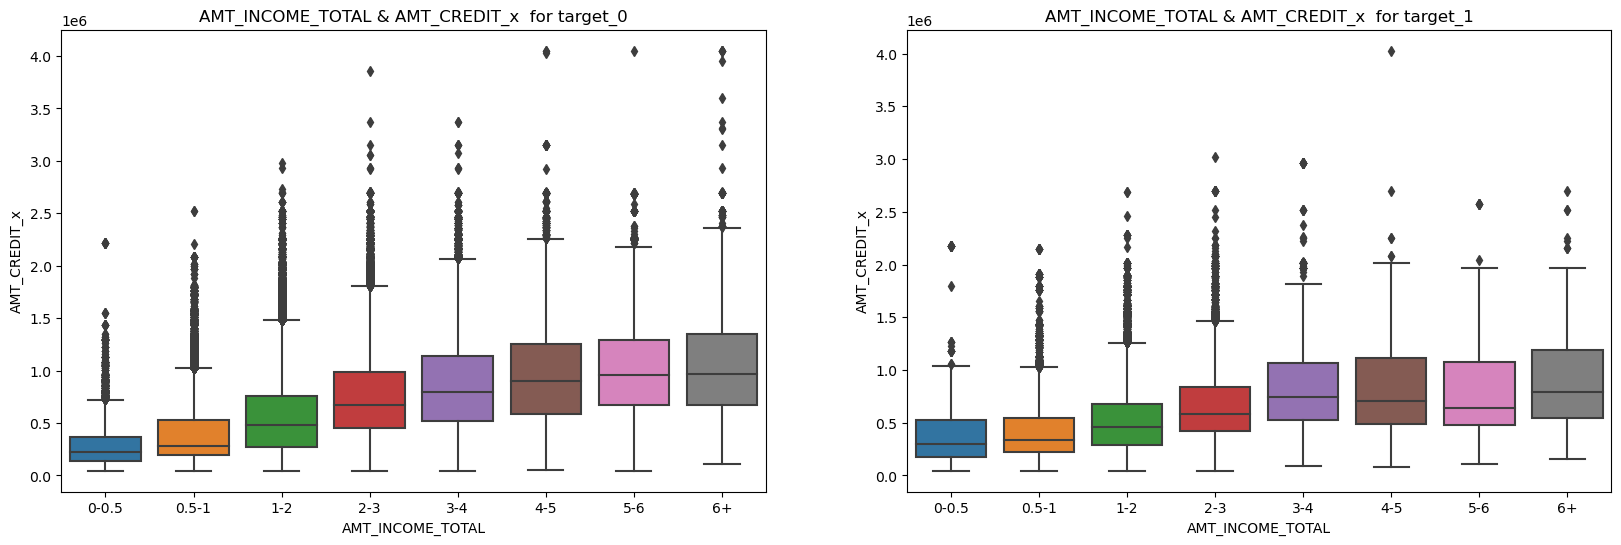

In [235]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('AMT_INCOME_TOTAL & AMT_CREDIT_x  for target_0')
sns.boxplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', data = merg_tar_0)

plt.subplot(1,2,2)
plt.title('AMT_INCOME_TOTAL & AMT_CREDIT_x  for target_1')
sns.boxplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', data = merg_tar_1)

plt.show()

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL_for merge_data'}, xlabel='AMT_INCOME_TOTAL', ylabel='count'>

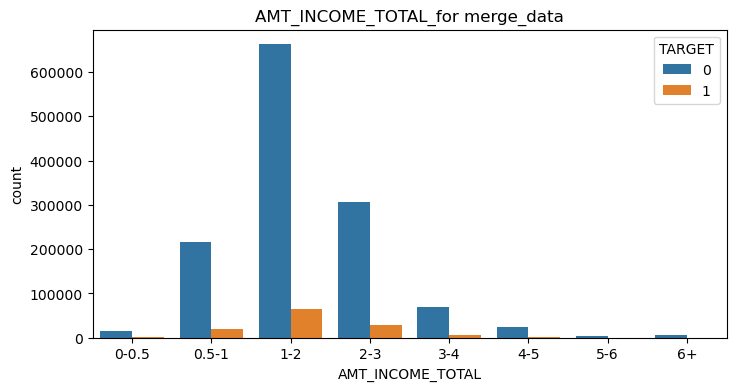

In [279]:
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
plt.title('AMT_INCOME_TOTAL_for merge_data')
sns.countplot('AMT_INCOME_TOTAL', hue='TARGET', data = merge_data)

Income Group of 1-2 has more count

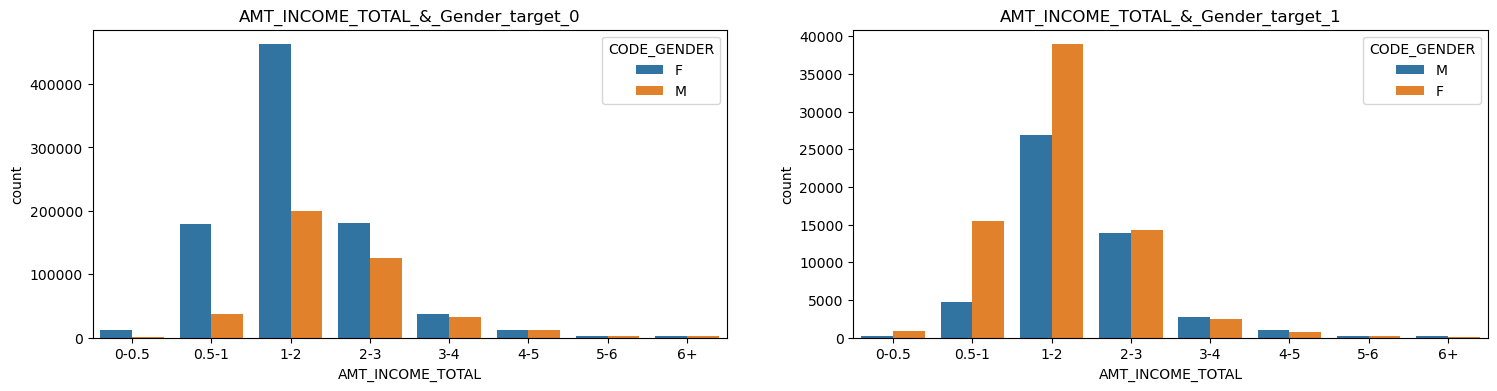

In [237]:
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
plt.title('AMT_INCOME_TOTAL_&_Gender_target_0')
sns.countplot('AMT_INCOME_TOTAL', hue='CODE_GENDER', data = merg_tar_0)

plt.subplot(1,2,2)
plt.title('AMT_INCOME_TOTAL_&_Gender_target_1')
sns.countplot('AMT_INCOME_TOTAL', hue='CODE_GENDER', data = merg_tar_1);

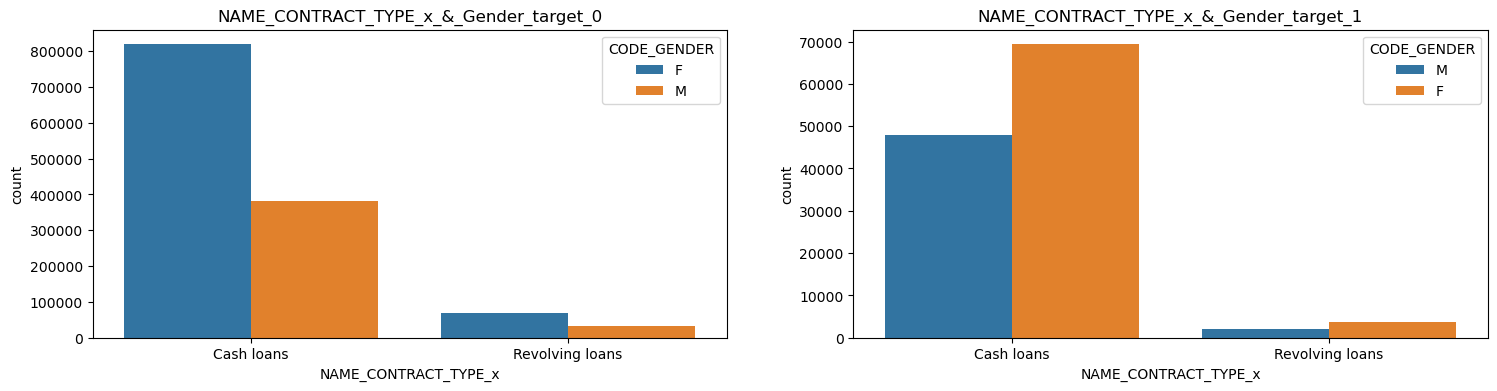

In [238]:
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
plt.title('NAME_CONTRACT_TYPE_x_&_Gender_target_0')
sns.countplot('NAME_CONTRACT_TYPE_x', hue='CODE_GENDER', data = merg_tar_0)

plt.subplot(1,2,2)
plt.title('NAME_CONTRACT_TYPE_x_&_Gender_target_1')
sns.countplot('NAME_CONTRACT_TYPE_x', hue='CODE_GENDER', data = merg_tar_1);

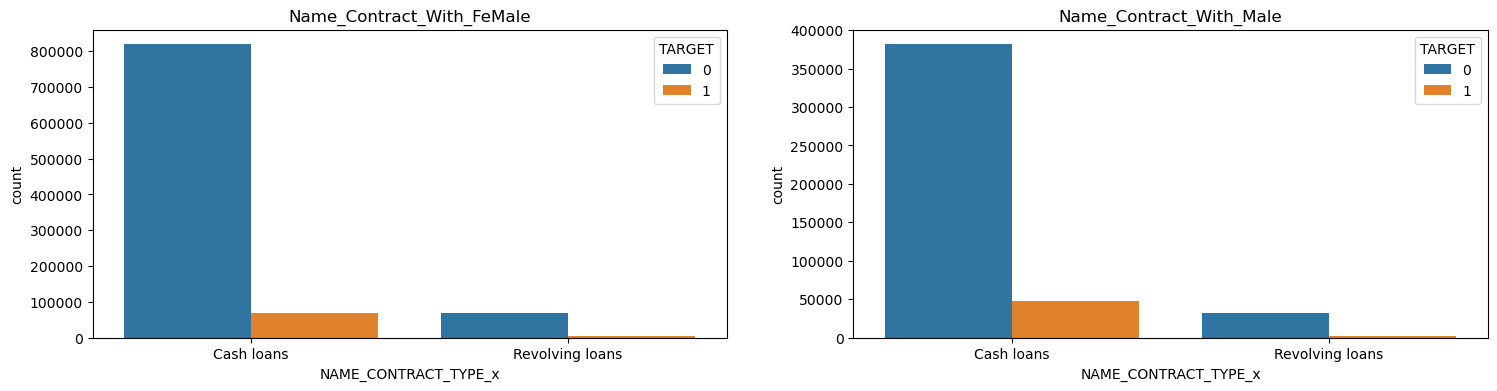

In [239]:
plt.figure(figsize=[18,4])

plt.subplot(1,2,1)
plt.title('Name_Contract_With_FeMale')
sns.countplot('NAME_CONTRACT_TYPE_x', hue='TARGET', data = merge_data[merge_data['CODE_GENDER']=='F'])

plt.subplot(1,2,2)
plt.title('Name_Contract_With_Male')
sns.countplot('NAME_CONTRACT_TYPE_x', hue='TARGET', data = merge_data[merge_data['CODE_GENDER']=='M']);

Males are more defaulters than Females as compare to ratio of count.

<AxesSubplot:title={'center':'DAYS_BIRTH_&_AMT_INCOME_TOTAL_1'}, xlabel='DAYS_BIRTH', ylabel='count'>

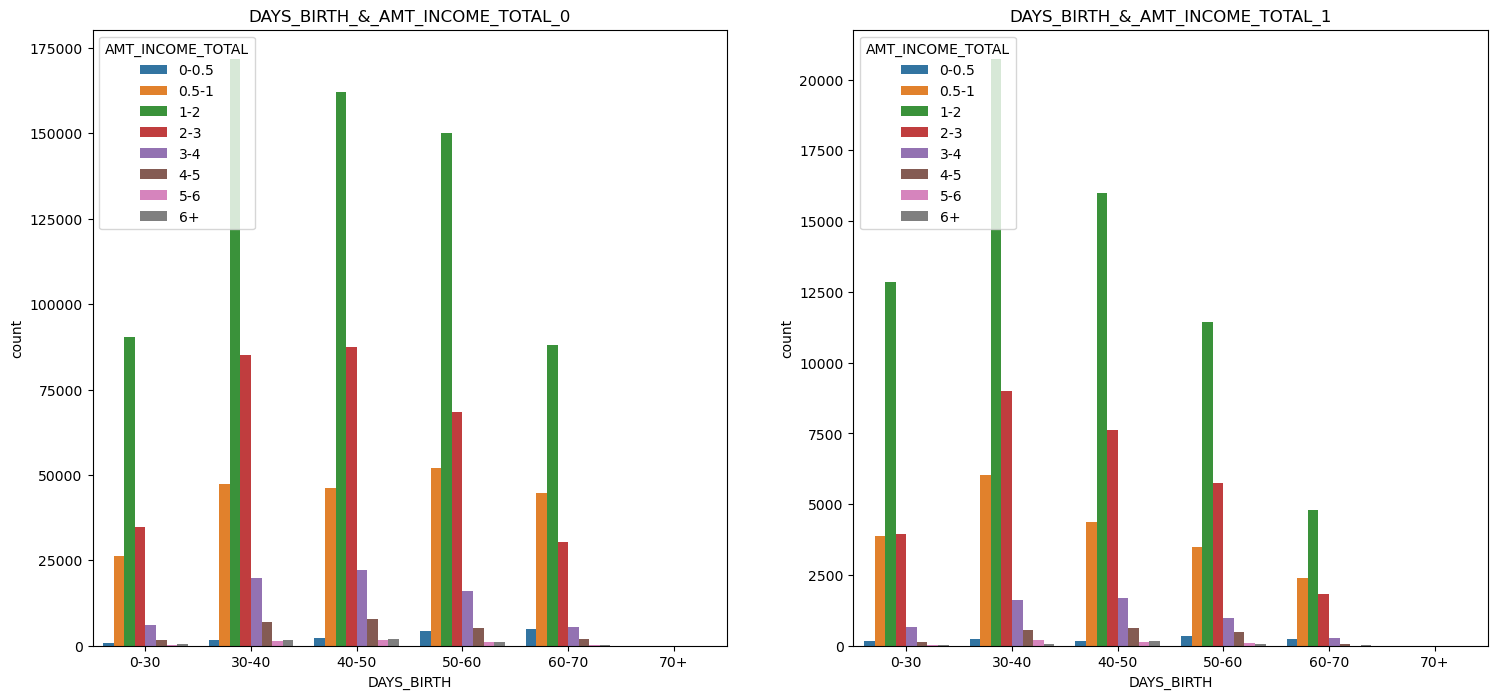

In [240]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('DAYS_BIRTH_&_AMT_INCOME_TOTAL_0')
sns.countplot('DAYS_BIRTH', hue='AMT_INCOME_TOTAL', data = merg_tar_0)

plt.subplot(1,2,2)
plt.title('DAYS_BIRTH_&_AMT_INCOME_TOTAL_1')
sns.countplot('DAYS_BIRTH', hue='AMT_INCOME_TOTAL', data = merg_tar_1)

AMT_INCOME_TOTAL group of 1-2 &  Age category 30-40 are more likely to defaulters. 
Their count of applying for loan is also high

<AxesSubplot:title={'center':'Name_Contract_With_Male'}, xlabel='DAYS_EMPLOYED', ylabel='count'>

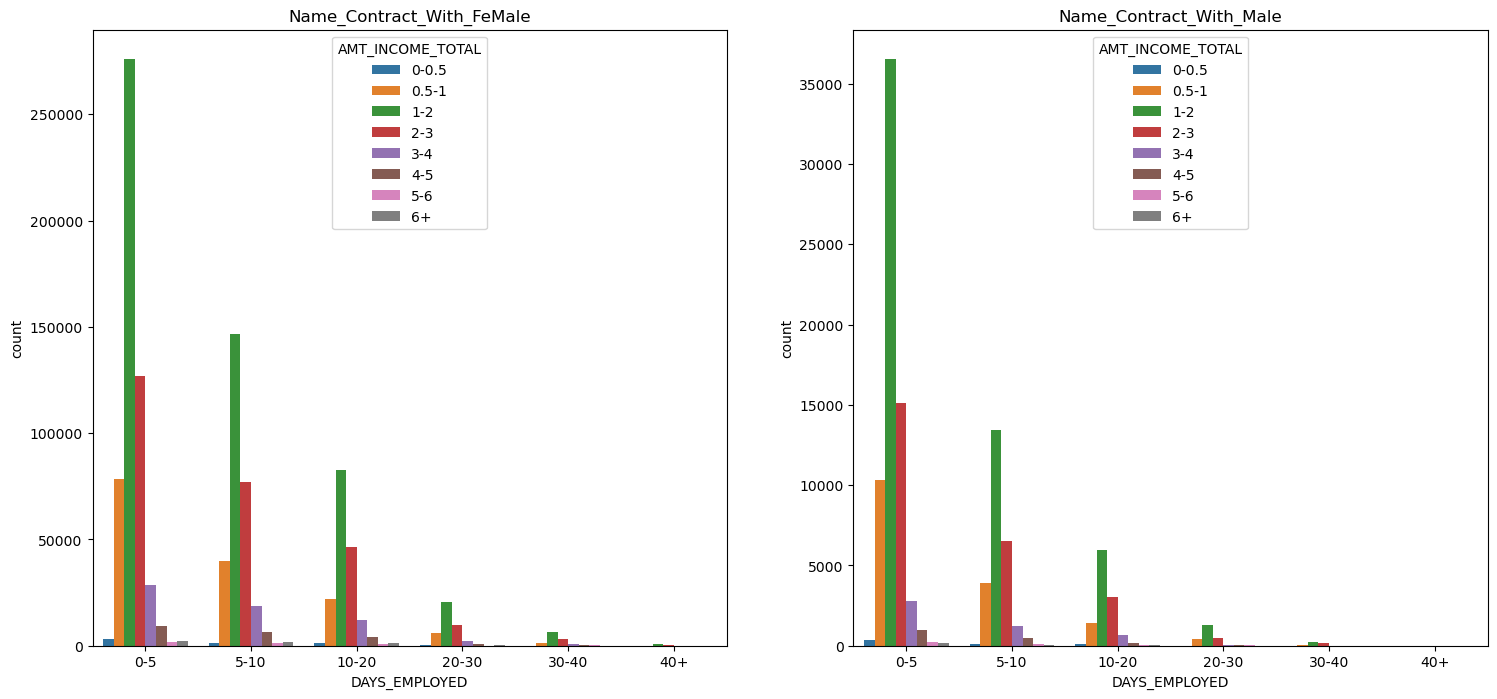

In [241]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('Name_Contract_With_FeMale')
sns.countplot('DAYS_EMPLOYED', hue='AMT_INCOME_TOTAL', data = merg_tar_0)

plt.subplot(1,2,2)
plt.title('Name_Contract_With_Male')
sns.countplot('DAYS_EMPLOYED', hue='AMT_INCOME_TOTAL', data = merg_tar_1)

AMT_INCOME_TOTAL group of 1-2 & Employed year 0-5 have higher count & more likely to be dafaulters.

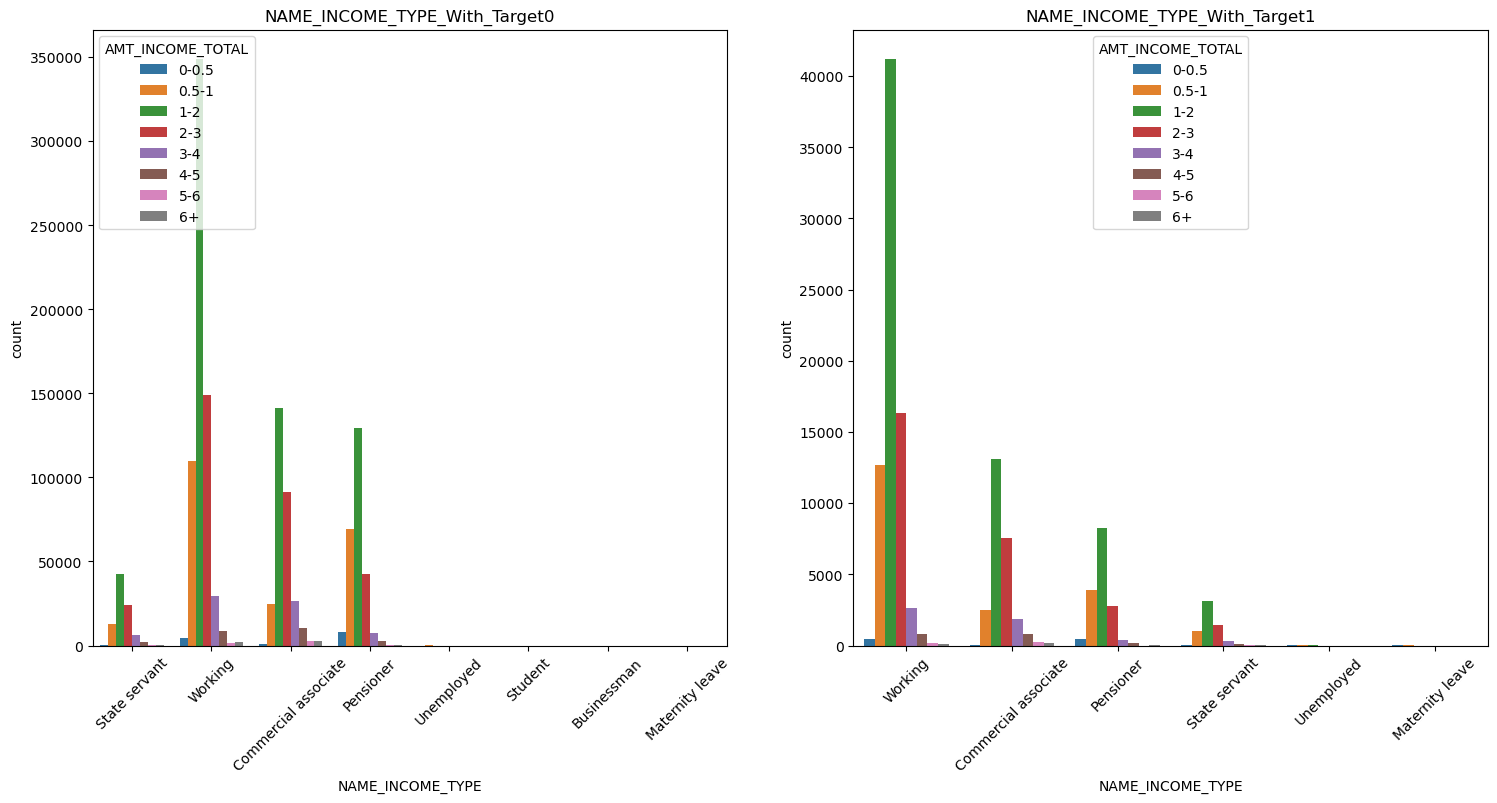

In [242]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('NAME_INCOME_TYPE_With_Target0')
sns.countplot('NAME_INCOME_TYPE', hue='AMT_INCOME_TOTAL', data = merg_tar_0)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NAME_INCOME_TYPE_With_Target1')
sns.countplot('NAME_INCOME_TYPE', hue='AMT_INCOME_TOTAL', data = merg_tar_1)
plt.xticks(rotation=45);

In [243]:
(40000/350000)*100

11.428571428571429

Income group 1-2 with working class has high defaulter ratio.  


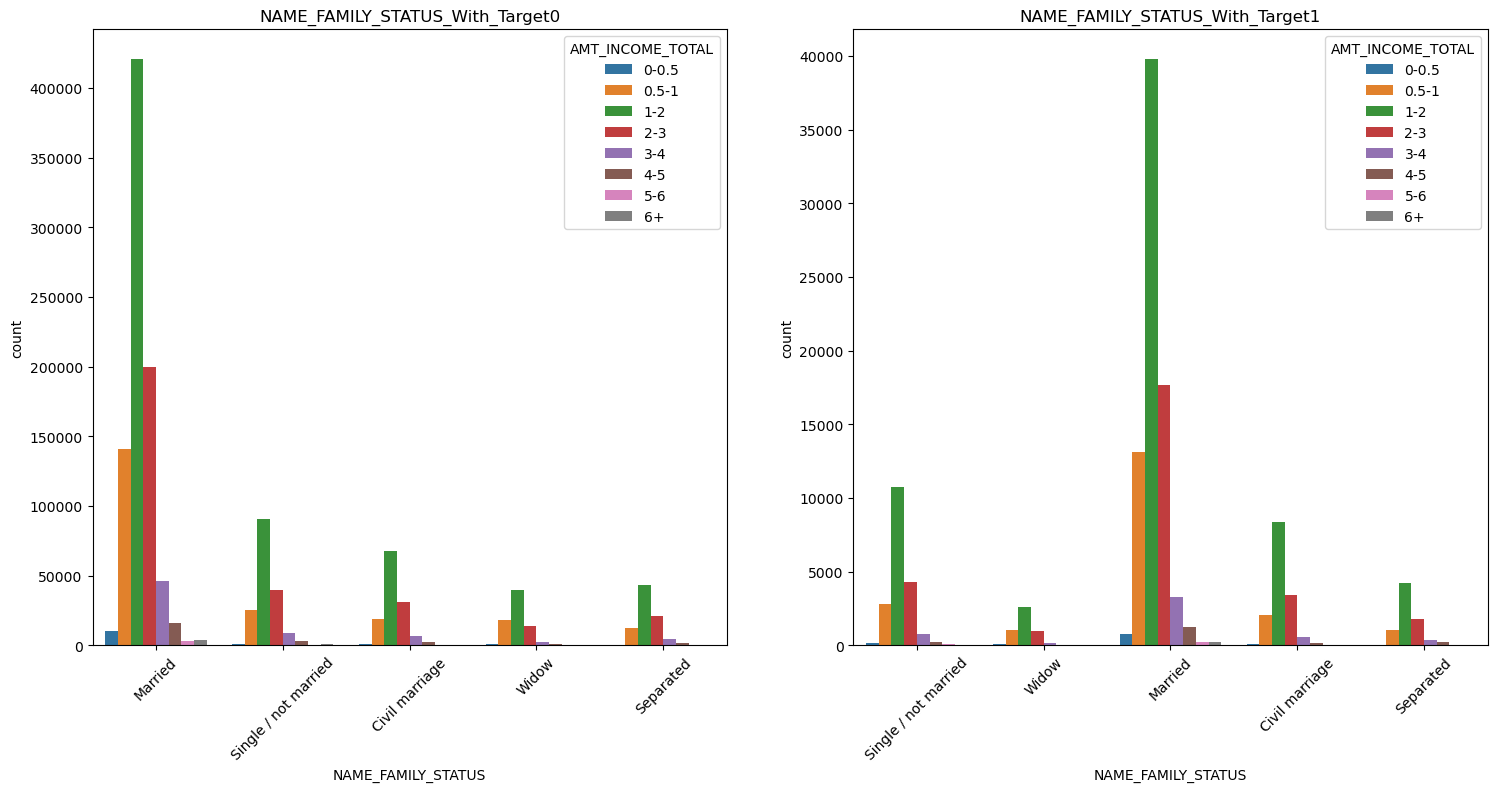

In [244]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('NAME_FAMILY_STATUS_With_Target0')
sns.countplot('NAME_FAMILY_STATUS', hue='AMT_INCOME_TOTAL', data = merg_tar_0)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NAME_FAMILY_STATUS_With_Target1')
sns.countplot('NAME_FAMILY_STATUS', hue='AMT_INCOME_TOTAL', data = merg_tar_1)
plt.xticks(rotation=45);

Married People with Income Group 1-2 is likely to be defaulter.

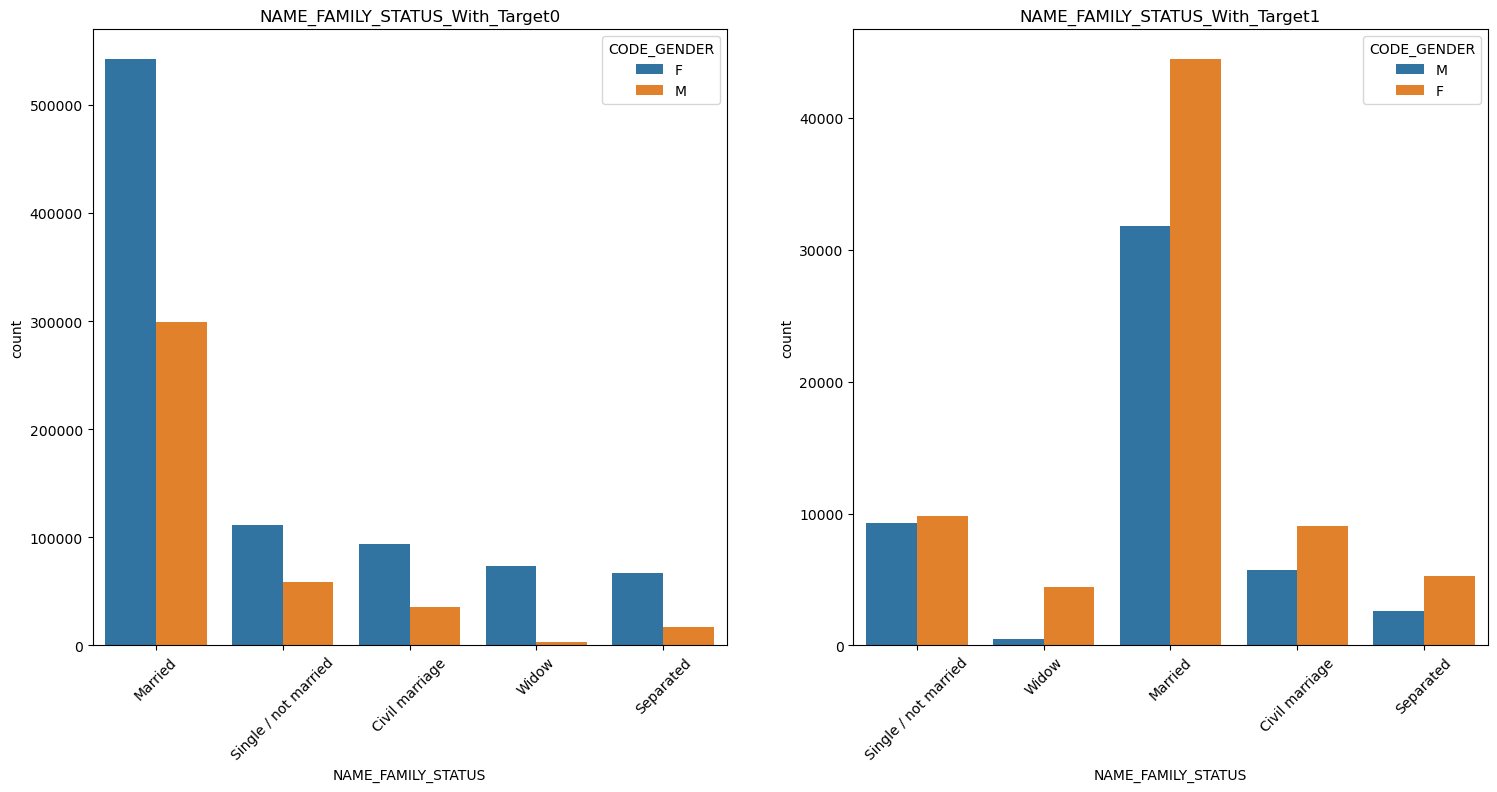

In [245]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('NAME_FAMILY_STATUS_With_Target0')
sns.countplot('NAME_FAMILY_STATUS', hue='CODE_GENDER', data = merg_tar_0)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NAME_FAMILY_STATUS_With_Target1')
sns.countplot('NAME_FAMILY_STATUS', hue='CODE_GENDER', data = merg_tar_1)
plt.xticks(rotation=45);

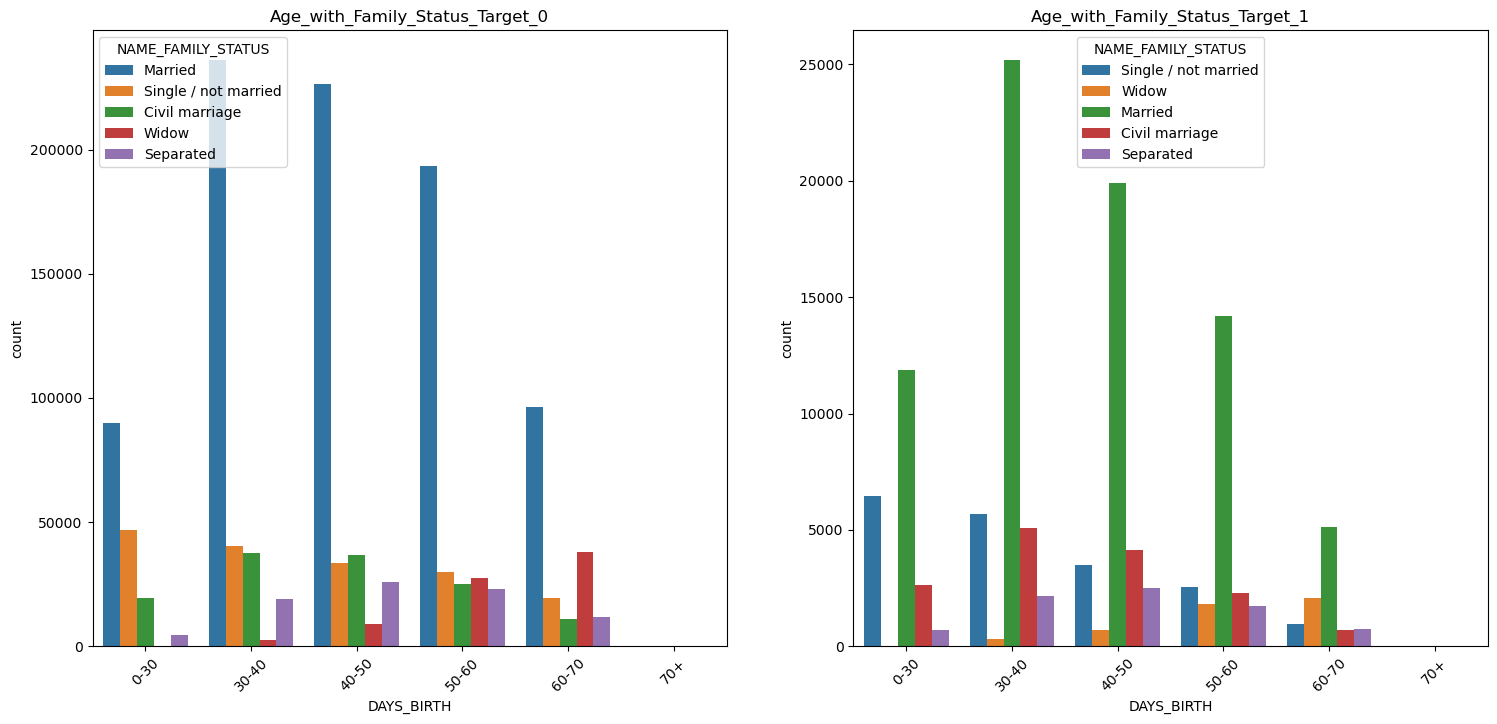

In [246]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title('Age_with_Family_Status_Target_0')
sns.countplot('DAYS_BIRTH', hue='NAME_FAMILY_STATUS', data = merg_tar_0)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Age_with_Family_Status_Target_1')
sns.countplot('DAYS_BIRTH', hue='NAME_FAMILY_STATUS', data = merg_tar_1)
plt.xticks(rotation=45);

- Married applicants with 30-40 & 40-50 are high numbers of defaulter.

- Single applicants with age group are of 0-30 have defaulting ratio very high.

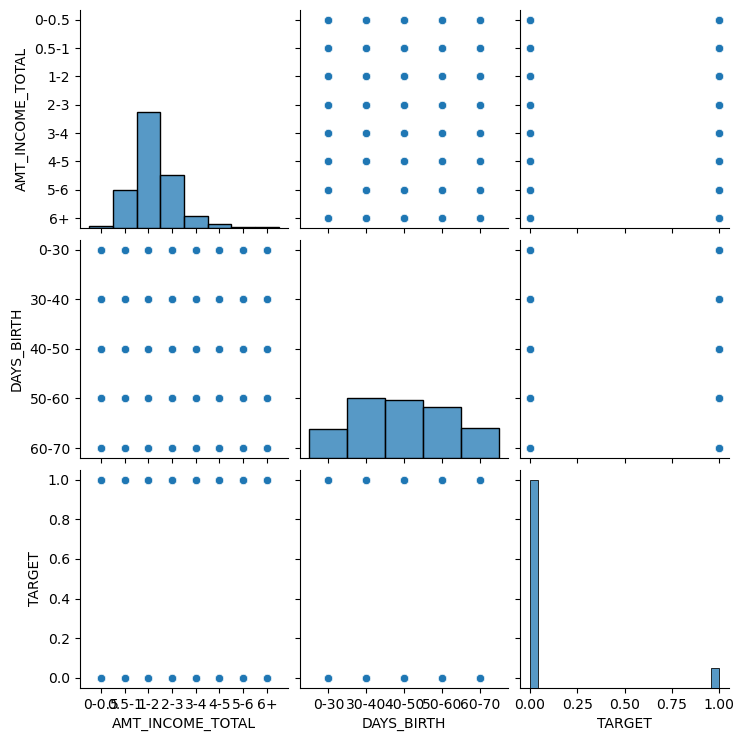

In [248]:
sns.pairplot(data=merge_data, vars= ['AMT_INCOME_TOTAL','DAYS_BIRTH', 'TARGET']);

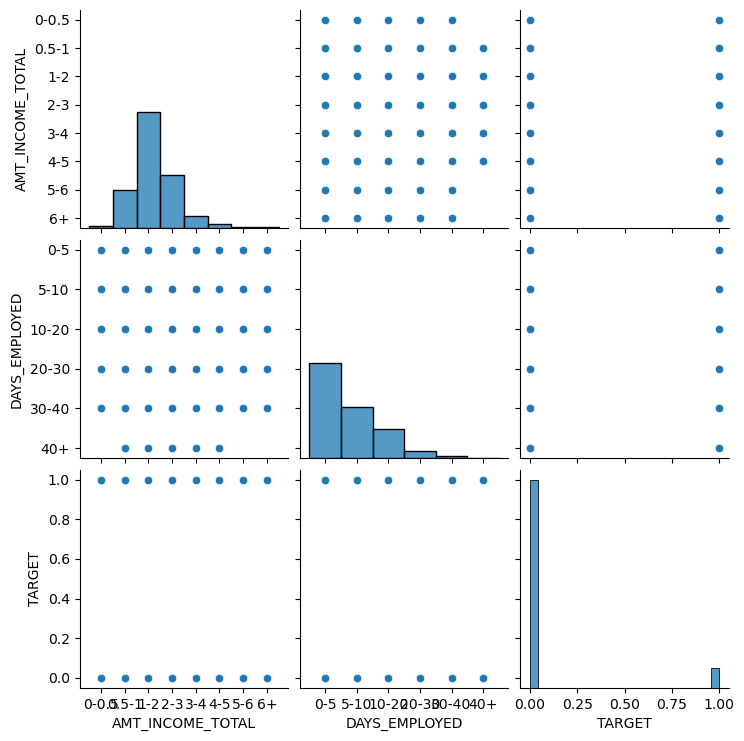

In [249]:
sns.pairplot(data=merge_data, vars= ['AMT_INCOME_TOTAL','DAYS_EMPLOYED', 'TARGET']);

# CORRELATION

In [280]:
merg_tar_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.000000,NaN,-0.003576,-0.001029,-0.000512,0.000968,0.003836,-0.002061,-0.004811,0.000702,0.002324,-0.000486,-0.002057,-0.000713,0.000748,-0.000836,0.001418,0.001990,-0.004544,-0.001200,-0.000562,0.002020,0.001251,0.000718,0.005139,0.000005,0.000373,0.000413,0.002236,-0.000397,-0.000406,0.001422
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.003576,NaN,1.000000,0.004440,0.000917,-0.021470,-0.189038,0.013826,0.878161,0.000403,-0.007112,-0.019993,-0.044005,0.016942,-0.001270,0.016432,-0.002077,0.001588,0.057630,-0.000623,-0.000613,0.003486,-0.009256,-0.013176,-0.065224,-0.002866,-0.034451,-0.035183,0.018983,0.001548,-0.013892,0.000692
AMT_CREDIT_x,-0.001029,NaN,0.004440,1.000000,0.986711,0.087872,-0.014143,-0.013818,0.064702,0.050234,0.019840,0.116832,0.011410,0.004765,-0.017672,0.004727,-0.020903,0.008376,0.090970,-0.002912,0.005759,-0.001186,0.057366,0.021258,-0.047663,-0.000617,0.118675,0.116676,0.047593,0.001304,-0.055732,0.003318
AMT_GOODS_PRICE,-0.000512,NaN,0.000917,0.986711,1.000000,0.090108,-0.016955,-0.011479,0.063075,0.059100,0.021365,0.122624,0.013566,0.006415,-0.017916,0.006307,-0.020990,0.010218,0.073398,-0.001939,0.006520,-0.000664,0.059436,0.021804,-0.048959,-0.000359,0.120284,0.116854,0.053894,0.001688,-0.056611,0.004237
REGION_POPULATION_RELATIVE,0.000968,NaN,-0.021470,0.087872,0.090108,1.000000,0.052687,0.003301,-0.020486,0.161347,-0.000064,0.188090,-0.004665,-0.007412,0.006737,-0.006852,0.004068,-0.002632,-0.070917,-0.002327,0.000412,-0.001728,0.074721,0.001103,0.006678,0.001066,0.045737,0.046316,0.155137,-0.000553,-0.022717,0.001411
DAYS_REGISTRATION,0.003836,NaN,-0.189038,-0.014143,-0.016955,0.052687,1.000000,0.100290,-0.182947,0.008479,-0.030500,0.055530,0.083850,-0.013319,-0.005357,-0.013159,-0.004647,0.005741,-0.037143,0.004257,0.000747,0.002891,0.008338,0.002622,0.041705,0.000725,0.011956,0.011898,-0.003764,-0.000262,-0.019261,-0.003014
DAYS_ID_PUBLISH,-0.002061,NaN,0.013826,-0.013818,-0.011479,0.003301,0.100290,1.000000,-0.002135,-0.032407,-0.031836,0.034470,0.063194,0.011992,-0.000059,0.012339,-0.001957,-0.004277,-0.061480,-0.000849,0.002293,0.005728,0.015194,0.009712,0.058996,-0.001459,0.009956,0.008206,-0.043345,0.000689,-0.043664,-0.001465
CNT_FAM_MEMBERS,-0.004811,NaN,0.878161,0.064702,0.063075,-0.020486,-0.182947,-0.002135,1.000000,-0.003503,-0.011787,-0.007101,-0.041084,0.028122,-0.002698,0.027750,-0.005646,-0.000052,0.067203,-0.000230,-0.000546,0.004665,-0.007208,-0.010958,-0.054638,-0.002946,-0.006309,-0.005848,0.010246,-0.000534,-0.018553,0.000482
HOUR_APPR_PROCESS_START_x,0.000702,NaN,0.000403,0.050234,0.059100,0.161347,0.008479,-0.032407,-0.003503,1.000000,0.046371,0.152266,-0.053368,-0.008607,-0.006433,-0.008395,-0.009113,-0.001920,-0.000854,-0.011865,0.003503,0.000440,0.043119,0.004516,-0.019167,-0.000754,0.008643,0.008326,0.387026,-0.000479,-0.001256,0.005119


In [281]:
merg_tar_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.000000,NaN,0.003576,0.001029,0.000512,0.000968,0.003836,0.002061,0.004811,0.000702,0.002324,0.000486,0.002057,0.000713,0.000748,0.000836,0.001418,0.001990,0.004544,0.001200,0.000562,0.002020,0.001251,0.000718,0.005139,0.000005,0.000373,0.000413,0.002236,0.000397,0.000406,0.001422
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.003576,NaN,1.000000,0.004440,0.000917,0.021470,0.189038,0.013826,0.878161,0.000403,0.007112,0.019993,0.044005,0.016942,0.001270,0.016432,0.002077,0.001588,0.057630,0.000623,0.000613,0.003486,0.009256,0.013176,0.065224,0.002866,0.034451,0.035183,0.018983,0.001548,0.013892,0.000692
AMT_CREDIT_x,0.001029,NaN,0.004440,1.000000,0.986711,0.087872,0.014143,0.013818,0.064702,0.050234,0.019840,0.116832,0.011410,0.004765,0.017672,0.004727,0.020903,0.008376,0.090970,0.002912,0.005759,0.001186,0.057366,0.021258,0.047663,0.000617,0.118675,0.116676,0.047593,0.001304,0.055732,0.003318
AMT_GOODS_PRICE,0.000512,NaN,0.000917,0.986711,1.000000,0.090108,0.016955,0.011479,0.063075,0.059100,0.021365,0.122624,0.013566,0.006415,0.017916,0.006307,0.020990,0.010218,0.073398,0.001939,0.006520,0.000664,0.059436,0.021804,0.048959,0.000359,0.120284,0.116854,0.053894,0.001688,0.056611,0.004237
REGION_POPULATION_RELATIVE,0.000968,NaN,0.021470,0.087872,0.090108,1.000000,0.052687,0.003301,0.020486,0.161347,0.000064,0.188090,0.004665,0.007412,0.006737,0.006852,0.004068,0.002632,0.070917,0.002327,0.000412,0.001728,0.074721,0.001103,0.006678,0.001066,0.045737,0.046316,0.155137,0.000553,0.022717,0.001411
DAYS_REGISTRATION,0.003836,NaN,0.189038,0.014143,0.016955,0.052687,1.000000,0.100290,0.182947,0.008479,0.030500,0.055530,0.083850,0.013319,0.005357,0.013159,0.004647,0.005741,0.037143,0.004257,0.000747,0.002891,0.008338,0.002622,0.041705,0.000725,0.011956,0.011898,0.003764,0.000262,0.019261,0.003014
DAYS_ID_PUBLISH,0.002061,NaN,0.013826,0.013818,0.011479,0.003301,0.100290,1.000000,0.002135,0.032407,0.031836,0.034470,0.063194,0.011992,0.000059,0.012339,0.001957,0.004277,0.061480,0.000849,0.002293,0.005728,0.015194,0.009712,0.058996,0.001459,0.009956,0.008206,0.043345,0.000689,0.043664,0.001465
CNT_FAM_MEMBERS,0.004811,NaN,0.878161,0.064702,0.063075,0.020486,0.182947,0.002135,1.000000,0.003503,0.011787,0.007101,0.041084,0.028122,0.002698,0.027750,0.005646,0.000052,0.067203,0.000230,0.000546,0.004665,0.007208,0.010958,0.054638,0.002946,0.006309,0.005848,0.010246,0.000534,0.018553,0.000482
HOUR_APPR_PROCESS_START_x,0.000702,NaN,0.000403,0.050234,0.059100,0.161347,0.008479,0.032407,0.003503,1.000000,0.046371,0.152266,0.053368,0.008607,0.006433,0.008395,0.009113,0.001920,0.000854,0.011865,0.003503,0.000440,0.043119,0.004516,0.019167,0.000754,0.008643,0.008326,0.387026,0.000479,0.001256,0.005119


In [282]:
merg_tar_0.corr().abs().unstack()

SK_ID_CURR        SK_ID_CURR                   1.000000
                  TARGET                            NaN
                  CNT_CHILDREN                 0.003576
                  AMT_CREDIT_x                 0.001029
                  AMT_GOODS_PRICE              0.000512
                                                 ...   
SELLERPLACE_AREA  AMT_CREDIT_y                 0.008713
                  HOUR_APPR_PROCESS_START_y    0.014749
                  NFLAG_LAST_APPL_IN_DAY       0.000798
                  DAYS_DECISION                0.016046
                  SELLERPLACE_AREA             1.000000
Length: 1024, dtype: float64

In [283]:
merg_tar_0.corr().abs().unstack().sort_values(kind='quicksort')

SK_ID_PREV                  SK_ID_CURR                    0.000005
SK_ID_CURR                  SK_ID_PREV                    0.000005
AMT_REQ_CREDIT_BUREAU_HOUR  SK_ID_PREV                    0.000012
SK_ID_PREV                  AMT_REQ_CREDIT_BUREAU_HOUR    0.000012
AMT_REQ_CREDIT_BUREAU_QRT   AMT_REQ_CREDIT_BUREAU_HOUR    0.000015
                                                            ...   
AMT_CREDIT_y                TARGET                             NaN
HOUR_APPR_PROCESS_START_y   TARGET                             NaN
NFLAG_LAST_APPL_IN_DAY      TARGET                             NaN
DAYS_DECISION               TARGET                             NaN
SELLERPLACE_AREA            TARGET                             NaN
Length: 1024, dtype: float64

In [284]:
mer_corr_0 = merg_tar_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()

In [285]:
mer_corr_0

SK_ID_PREV                  SK_ID_CURR                    0.000005
SK_ID_CURR                  SK_ID_PREV                    0.000005
AMT_REQ_CREDIT_BUREAU_HOUR  SK_ID_PREV                    0.000012
SK_ID_PREV                  AMT_REQ_CREDIT_BUREAU_HOUR    0.000012
AMT_REQ_CREDIT_BUREAU_QRT   AMT_REQ_CREDIT_BUREAU_HOUR    0.000015
                                                            ...   
AMT_APPLICATION             AMT_APPLICATION               1.000000
AMT_CREDIT_y                AMT_CREDIT_y                  1.000000
HOUR_APPR_PROCESS_START_y   HOUR_APPR_PROCESS_START_y     1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      1.000000
SELLERPLACE_AREA            SELLERPLACE_AREA              1.000000
Length: 961, dtype: float64

In [286]:
mer_corr_0 = mer_corr_0[mer_corr_0 != 1.0]

In [287]:
print(mer_corr_0)

SK_ID_PREV                  SK_ID_CURR                    0.000005
SK_ID_CURR                  SK_ID_PREV                    0.000005
AMT_REQ_CREDIT_BUREAU_HOUR  SK_ID_PREV                    0.000012
SK_ID_PREV                  AMT_REQ_CREDIT_BUREAU_HOUR    0.000012
AMT_REQ_CREDIT_BUREAU_QRT   AMT_REQ_CREDIT_BUREAU_HOUR    0.000015
                                                            ...   
AMT_CREDIT_y                AMT_APPLICATION               0.975764
AMT_GOODS_PRICE             AMT_CREDIT_x                  0.986711
AMT_CREDIT_x                AMT_GOODS_PRICE               0.986711
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998577
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.998577
Length: 930, dtype: float64


In [288]:
mer_corr_0.sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.998577
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998577
AMT_CREDIT_x                AMT_GOODS_PRICE               0.986711
AMT_GOODS_PRICE             AMT_CREDIT_x                  0.986711
AMT_CREDIT_y                AMT_APPLICATION               0.975764
                                                            ...   
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT     0.000015
                            SK_ID_PREV                    0.000012
SK_ID_PREV                  AMT_REQ_CREDIT_BUREAU_HOUR    0.000012
SK_ID_CURR                  SK_ID_PREV                    0.000005
SK_ID_PREV                  SK_ID_CURR                    0.000005
Length: 930, dtype: float64

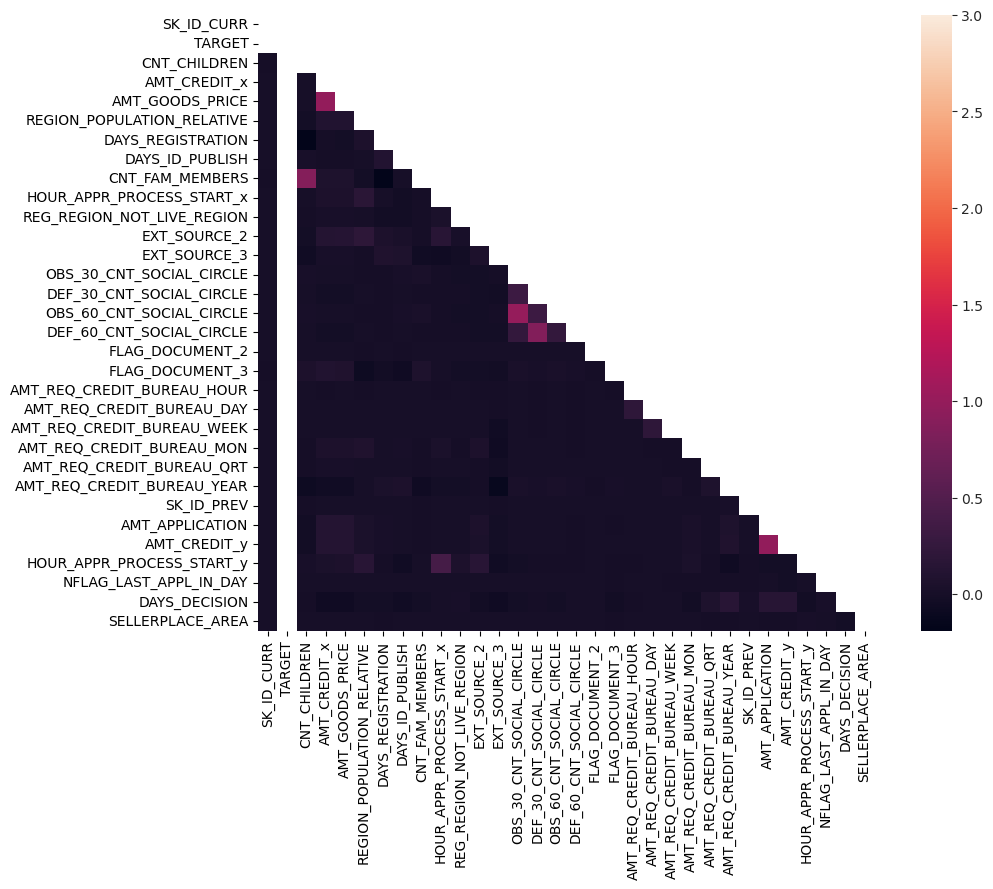

In [289]:
corr = merg_tar_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=[12,8])
with sns.axes_style('darkgrid'):
    ax = sns.heatmap(corr, mask=mask, vmax=3, square=True)

In [291]:
mer_corr_1 = merg_tar_1.corr().abs().unstack().sort_values(kind='quicksort').dropna()
mer_corr_1

NFLAG_LAST_APPL_IN_DAY     DEF_60_CNT_SOCIAL_CIRCLE      0.000027
DEF_60_CNT_SOCIAL_CIRCLE   NFLAG_LAST_APPL_IN_DAY        0.000027
OBS_60_CNT_SOCIAL_CIRCLE   AMT_REQ_CREDIT_BUREAU_QRT     0.000062
AMT_REQ_CREDIT_BUREAU_QRT  OBS_60_CNT_SOCIAL_CIRCLE      0.000062
SK_ID_PREV                 REGION_POPULATION_RELATIVE    0.000123
                                                           ...   
AMT_APPLICATION            AMT_APPLICATION               1.000000
AMT_CREDIT_y               AMT_CREDIT_y                  1.000000
HOUR_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y     1.000000
OBS_60_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE      1.000000
SELLERPLACE_AREA           SELLERPLACE_AREA              1.000000
Length: 961, dtype: float64

In [292]:
mer_corr_1 = mer_corr_1[mer_corr_1 != 1.0]
mer_corr_1

NFLAG_LAST_APPL_IN_DAY     DEF_60_CNT_SOCIAL_CIRCLE      0.000027
DEF_60_CNT_SOCIAL_CIRCLE   NFLAG_LAST_APPL_IN_DAY        0.000027
OBS_60_CNT_SOCIAL_CIRCLE   AMT_REQ_CREDIT_BUREAU_QRT     0.000062
AMT_REQ_CREDIT_BUREAU_QRT  OBS_60_CNT_SOCIAL_CIRCLE      0.000062
SK_ID_PREV                 REGION_POPULATION_RELATIVE    0.000123
                                                           ...   
AMT_APPLICATION            AMT_CREDIT_y                  0.975686
AMT_CREDIT_x               AMT_GOODS_PRICE               0.983014
AMT_GOODS_PRICE            AMT_CREDIT_x                  0.983014
OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE      0.998393
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE      0.998393
Length: 930, dtype: float64

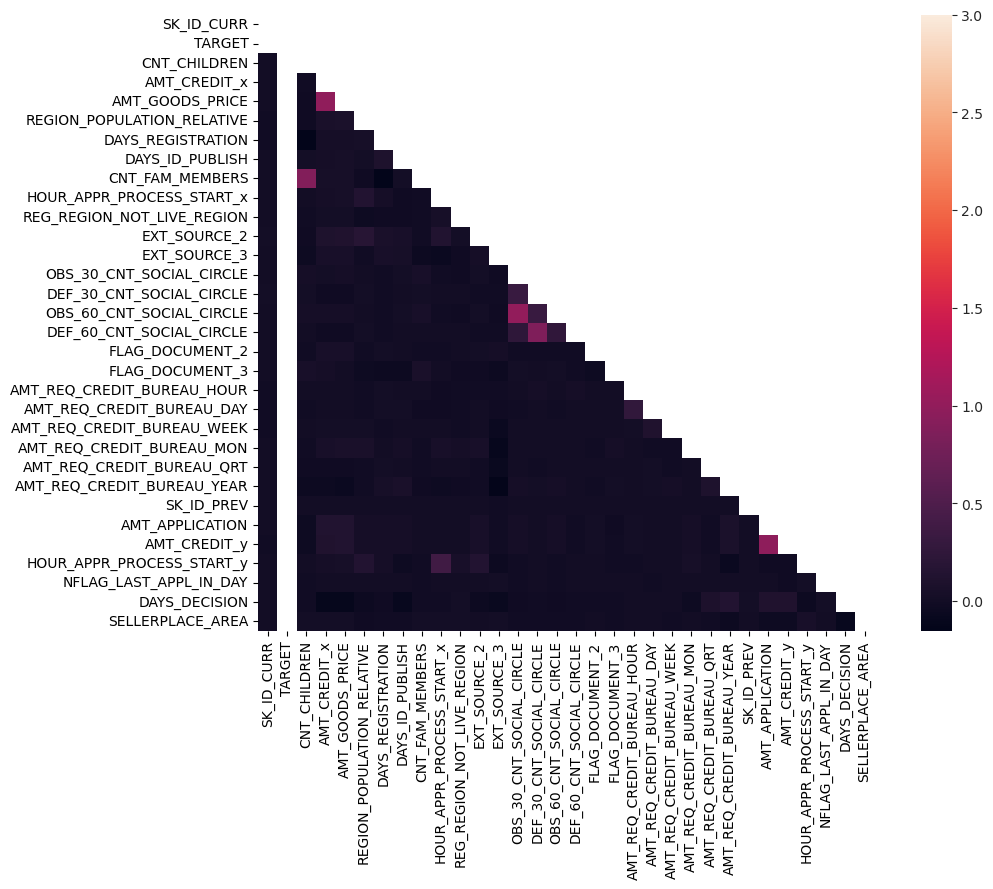

In [293]:
corr = merg_tar_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=[12,8])
with sns.axes_style('darkgrid'):
    ax = sns.heatmap(corr, mask=mask, vmax=3, square=True)

In [ ]:
pd.pivot_table(data = merge_data, index = 'NAME_CONTRACT_STATUS', columns = 'NAME_INCOME_TYPE', values= 'TARGET', aggfunc='sum')

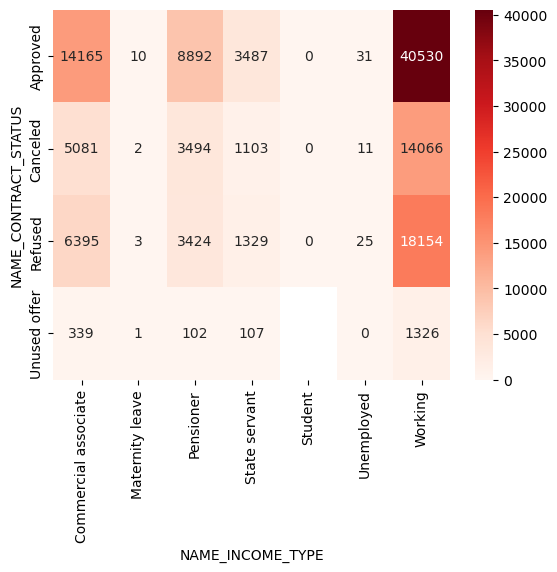

<Figure size 1400x400 with 0 Axes>

In [211]:
sns.heatmap(pd.pivot_table(data = merge_data, index = 'NAME_CONTRACT_STATUS', columns = 'NAME_INCOME_TYPE', values= 'TARGET', aggfunc='sum'), annot=True, cmap = 'Reds', fmt='g')
plt.figure(figsize=[14,4]);

- Working people with approved loans has highest numbers of defaulters.

- Commerical assosite with apporved loan also defaulted

- Prevoius application rejected applicant like refused, Cancelled have defaulted in current applicants.

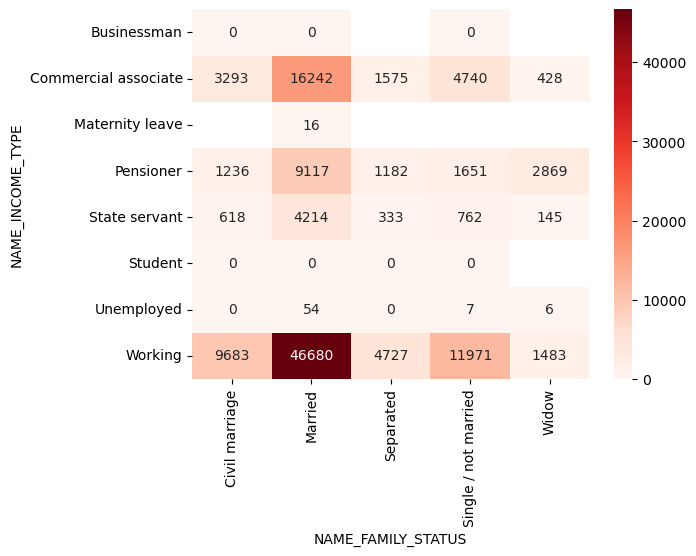

<Figure size 1400x400 with 0 Axes>

In [210]:
sns.heatmap(pd.pivot_table(data = merge_data, index = 'NAME_INCOME_TYPE', columns = 'NAME_FAMILY_STATUS', values= 'TARGET', aggfunc='sum'), annot=True, cmap = 'Reds', fmt='g')
plt.figure(figsize=[14,4]);

- Married People with class Working is highest number of defaulted

- After that Commerical assosiate with Married applicants & Working class with Single & Civil Marriage applicants have been defaulted.

- Unemployed applicants have least number of defaulters.

- Business class with Civil Marriage , Married, Single applicants are not defaulted.

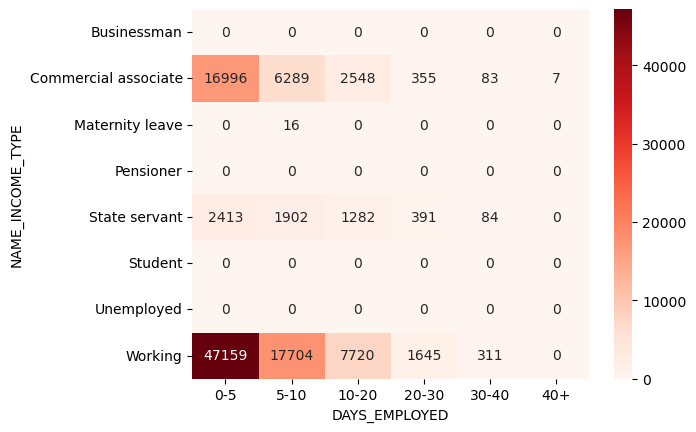

<Figure size 1400x400 with 0 Axes>

In [209]:
sns.heatmap(pd.pivot_table(data = merge_data, index = 'NAME_INCOME_TYPE', columns = 'DAYS_EMPLOYED', values= 'TARGET', aggfunc='sum'), annot=True, cmap = 'Reds', fmt='g')
plt.figure(figsize=[14,4]);

- Working class with 0-5 working experience are most number of defaulters.

- after that working class with 5-10 years working experience & Commercial associate with 0-5 years experience applicants have been defaulted.

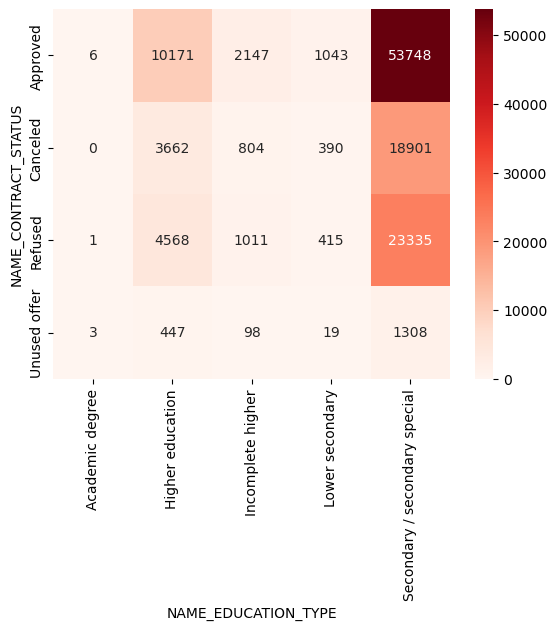

<Figure size 1400x400 with 0 Axes>

In [208]:
sns.heatmap(pd.pivot_table(data = merge_data, index = 'NAME_CONTRACT_STATUS', columns = 'NAME_EDUCATION_TYPE', values= 'TARGET', aggfunc='sum'), annot=True, cmap = 'Reds', fmt='g')
plt.figure(figsize=[14,4]);

- Secondary Education with approved loan have high number of defaulters.

- Previously Refused & Cancelled Secondary Education applicants defaulted in current application.

- Higher Education with approved loan applicants defaulted. 


# Summary

### All following vairable are Defaulters

- Working class
- Income group of 1-2
- Male
- Age group of 30-40 & 40-50
- 0-5 year experience employee with working class
- Commercial assosiate
- Previous applicants which applicantion are cancelled, Refused, unused offer

### All following vairable are Non Defaulters

- Female
- High Education
- Businessman & State Servant
- 30-40 years experience employee
- Old peoples